In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import time
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway
from random import randint
from math import ceil

from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsRestClassifier

#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeCV

#imbalanced methods
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## Initial Features

`encounter_id` : The unique identifier of the encounter <br>
`country` : Country <br>
`patient_id`:  Identifier of the patient <br>
`race` : Patient's race <br>
`gender`: Patient's gender <br>
`age`: Patient’s age <br>
`Weight`: Patient's Weight <br>
`payer_code`: Code of the health insurance provider (if there is one) <br>
`outpatient_visits_in_previous_year`: Number of outpatient visits (visits made with the intention
of leaving on the same day) the patient made to the hospital in the year preceding the encounter <br>
`emergency_visits_in_previous_year`: Number of emergency visits the patient made to the hospital
in the year preceding the encounter <br>
`inpatient_visits_in_previous_year`: Number of inpatient visits (visits with the intention to stay overnight) the patient made to the hospital in the year preceding the encounter
<br>
`admission_type`: Type of admission of the patient (e.g. Emergency, Urgent,
etc...) <br>
`medical_specialty`: Medical specialty on which the patient was admitted <br>
`average_pulse_bpm`: Average pulse of the patient during their stay in the hospital
in beats per minute <br>
`discharge_disposition` : Destination given to the patient after being discharged<br>
`admission_source` : Source of the patient before being admitted in the current
encounter
<br>
`length_of_stay_in_hospital` : Number of days between admission and discharge <br>
`number_lab_tests`: Number of lab tests performed during the encounter <br>
`non_lab_procedures` : Number of non-lab procedures performed during the
encounter <br>
`number_of_medications` : Number of distinct types of medication administered during
the encounter <br>
`primary_diagnosis` : Primary diagnosis (coded as first three digits of ICD9) <br>
`secondary_diagnosis` : Secondary diagnosis (first three digits of ICD9) <br>
`additional_diagnosis` : Additional secondary diagnosis (first three digits of ICD9) <br>
`number_diagnoses` : Number of diagnoses entered to the system <br>
`glucose_test_result` : Range of the glucose test results or if the test was not taken <br>
`a1c_test_result` : Range of the A1C test results or if the test was not taken.<br>
`change_in_meds_during_hospitalization` : Indicates if there was a change in diabetic medications
(dosage or generic name). <br>
`prescribed_diabetes_meds` : Yes if patient has diabetes medication perscribed. No
otherwise. <br>
`medication` : List containing all generic names for the medications
perscribed to the patient during the encounter. Empty list if
no medication was perscribed. <br>

## Features after pre-process
- Race 
- Payer_code
- admission_type
- medical_specialty
- discharge_disposition
- admission_source 
- primary_diagnosis_types
- secondary_diagnosis_types
- additional_diagnosis_types
- glucose_test_result
- a1c_test_result 
- outpatient_visits
- emergency_visits
- inpatient_visits
- average_pulse_bpm
- length_of_stay
- number_lab_tests
- non_lab_procedures
- number_of_medications
- number_diagnoses
- race_caucasian
- number_generic_medications
- metformin
- insulin
- Sulfonylureas
- Meglitinides
- Thiazolidinediones
- Alpha_Glucosidase_Inhibitors
- Combination_Medications
- Midpoint_Age
- gender_binary
- presc_diabetes_meds_binary
- change_in_meds_binary
- Has_Insurance
- is_normal_pulse
- number_encounters_total
- Total_visits
- Serious_condition_visits


## Target Variables
`readmitted_binary` : Binary target: Yes if patient was readmitted in less than 30
days, No otherwise. <br>
`readmitted_multiclass` : Multiclass target: “<30 days” if patient was readmitted in less than 30 days after being discharged. “>30 days if patient was readmitted to the hospital but only after more than 30 days after the current discharge. No otherwise. <br>


### Read the files

In [2]:
X_multiclass = pd.read_csv('/Users/tomasverissimo/Desktop/Master/1st Year/1st Semester/Machine Learning/Project - Group 18/Final Notebooks/Multiclass/X_multiclass_ne.csv', index_col='encounter_id')
y_multiclass = pd.read_csv('/Users/tomasverissimo/Desktop/Master/1st Year/1st Semester/Machine Learning/Project - Group 18/Final Notebooks/Multiclass/y_multiclass_ne.csv', index_col='encounter_id')

In [3]:
X_multiclass.head()

race payer_code  outpatient_visits  emergency_visits  \
encounter_id                                                                    
533253              Caucasian        NaN                  0                 0   
426224        AfricanAmerican        NaN                  0                 0   
634063              Caucasian        NaN                  0                 0   
890610        AfricanAmerican         MC                  0                 0   
654194              Caucasian         HM                  1                 0   

              inpatient_visits    admission_type       medical_specialty  \
encounter_id                                                               
533253                       2  Urgent/Emergency  Family_GeneralPractice   
426224                       0  Urgent/Emergency                 Unknown   
634063                       1        Other_type  Family_GeneralPractice   
890610                       1  Urgent/Emergency        InternalMedicine   
654194                       0          Elective                 Unknown   

              average_pulse_bpm                    discharge_disposition  \
encounter_id                                                               
533253                      127                       Discharged_to_home   
426224                      128  Transferred_to_another_medical_facility   
634063                       94                       Discharged_to_home   
890610                       81                       Discharged_to_home   
654194                      126                       Discharged_to_home   

             admission_source  ...  presc_diabetes_meds_binary  \
encounter_id                   ...                               
533253         Emergency_Room  ...                           0   
426224               Referral  ...                           1   
634063              No_source  ...                           1   
890610           Other_source  ...                           0   
654194               Referral  ...                           0   

              change_in_meds_binary  Has_Insurance  primary_diagnosis_types  \
encounter_id                                                                  
533253                            0              0              Respiratory   
426224                            0              0     Infectious_parasitic   
634063                            1              0                Digestive   
890610                            0              1                Digestive   
654194                            0              1          Musculoskeletal   

              secondary_diagnosis_types additional_diagnosis_types  \
encounter_id                                                         
533253                        Metabolic                Respiratory   
426224                      Circulatory                  Neoplasms   
634063             Infectious_parasitic                   Diabetes   
890610                        Digestive                Circulatory   
654194                    Genitourinary                Circulatory   

             is_normal_pulse  number_encounters_total  Total_visits  \
encounter_id                                                          
533253                     0                        6             2   
426224                     0                        1             0   
634063                     1                        1             1   
890610                     1                        1             1   
654194                     0                        2             1   

              Serious_condition_visits  
encounter_id                            
533253                               2  
426224                               0  
634063                               1  
890610                               1  
654194                               0  

[5 rows x 38 columns]

In [4]:
y_multiclass.head()

readmitted_multiclass
encounter_id                      
533253                    >30 days
426224                          No
634063                          No
890610                          No
654194                    >30 days

In [5]:
X_multiclass.shape

(71236, 38)

In [6]:
y_multiclass.shape

(71236, 1)

In [7]:
X_multiclass.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [8]:
y_multiclass.columns

Index(['readmitted_multiclass'], dtype='object')

In [9]:
X_multiclass.describe(include = 'all').T

count unique                 top   freq  \
race                            71236      6           Caucasian  51779   
payer_code                      43035     10                  MC  22683   
outpatient_visits             71236.0    NaN                 NaN    NaN   
emergency_visits              71236.0    NaN                 NaN    NaN   
inpatient_visits              71236.0    NaN                 NaN    NaN   
admission_type                  71236      3    Urgent/Emergency  50779   
medical_specialty               71236      7             Unknown  34922   
average_pulse_bpm             71236.0    NaN                 NaN    NaN   
discharge_disposition           71236      7  Discharged_to_home  51342   
admission_source                71236      4      Emergency_Room  40319   
length_of_stay                71236.0    NaN                 NaN    NaN   
number_lab_tests              71236.0    NaN                 NaN    NaN   
non_lab_procedures            71236.0    NaN                 NaN    NaN   
number_of_medications         71236.0    NaN                 NaN    NaN   
number_diagnoses              71236.0    NaN                 NaN    NaN   
glucose_test_result             71236      3           Not_taken  67548   
a1c_test_result                 71236      3           Not_taken  59320   
race_caucasian                71236.0    NaN                 NaN    NaN   
number_generic_medications    71236.0    NaN                 NaN    NaN   
insulin                       71236.0    NaN                 NaN    NaN   
metformin                     71236.0    NaN                 NaN    NaN   
Sulfonylureas                 71236.0    NaN                 NaN    NaN   
Meglitinides                  71236.0    NaN                 NaN    NaN   
Thiazolidinediones            71236.0    NaN                 NaN    NaN   
Alpha_Glucosidase_Inhibitors  71236.0    NaN                 NaN    NaN   
Combination_Medications       71236.0    NaN                 NaN    NaN   
Midpoint_Age                  69019.0    NaN                 NaN    NaN   
gender_binary                 71236.0    NaN                 NaN    NaN   
presc_diabetes_meds_binary    71236.0    NaN                 NaN    NaN   
change_in_meds_binary         71236.0    NaN                 NaN    NaN   
Has_Insurance                 71236.0    NaN                 NaN    NaN   
primary_diagnosis_types         71236     18         Circulatory  21288   
secondary_diagnosis_types       71236     18         Circulatory  22345   
additional_diagnosis_types      71236     18         Circulatory  21234   
is_normal_pulse               71236.0    NaN                 NaN    NaN   
number_encounters_total       71236.0    NaN                 NaN    NaN   
Total_visits                  71236.0    NaN                 NaN    NaN   
Serious_condition_visits      71236.0    NaN                 NaN    NaN   

                                   mean        std   min   25%    50%    75%  \
race                                NaN        NaN   NaN   NaN    NaN    NaN   
payer_code                          NaN        NaN   NaN   NaN    NaN    NaN   
outpatient_visits              0.369588   1.287469   0.0   0.0    0.0    0.0   
emergency_visits               0.196249   0.910854   0.0   0.0    0.0    0.0   
inpatient_visits               0.640154   1.267271   0.0   0.0    0.0    1.0   
admission_type                      NaN        NaN   NaN   NaN    NaN    NaN   
medical_specialty                   NaN        NaN   NaN   NaN    NaN    NaN   
average_pulse_bpm             99.611222  23.040521  60.0  80.0  100.0  119.0   
discharge_disposition               NaN        NaN   NaN   NaN    NaN    NaN   
admission_source                    NaN        NaN   NaN   NaN    NaN    NaN   
length_of_stay                 4.391024   2.988739   1.0   2.0    4.0    6.0   
number_lab_tests              43.095654  19.642919   1.0  31.0   44.0   57.0   
non_lab_procedures             1.340923   1.706664   0.0   0.0    

In [10]:
y_multiclass.describe()

readmitted_multiclass
count                  71236
unique                     3
top                       No
freq                   38405

In [11]:
X_multiclass.isna().sum()

race                                0
payer_code                      28201
outpatient_visits                   0
emergency_visits                    0
inpatient_visits                    0
admission_type                      0
medical_specialty                   0
average_pulse_bpm                   0
discharge_disposition               0
admission_source                    0
length_of_stay                      0
number_lab_tests                    0
non_lab_procedures                  0
number_of_medications               0
number_diagnoses                    0
glucose_test_result                 0
a1c_test_result                     0
race_caucasian                      0
number_generic_medications          0
insulin                             0
metformin                           0
Sulfonylureas                       0
Meglitinides                        0
Thiazolidinediones                  0
Alpha_Glucosidase_Inhibitors        0
Combination_Medications             0
Midpoint_Age

In [12]:
y_multiclass.isna().sum()

readmitted_multiclass    0
dtype: int64

In [13]:
X_multiclass.duplicated().sum()

0

In [14]:
y_multiclass.duplicated().sum()

71233

### Visual Exploration


In [15]:
X_multiclass.dtypes

race                             object
payer_code                       object
outpatient_visits                 int64
emergency_visits                  int64
inpatient_visits                  int64
admission_type                   object
medical_specialty                object
average_pulse_bpm                 int64
discharge_disposition            object
admission_source                 object
length_of_stay                    int64
number_lab_tests                  int64
non_lab_procedures                int64
number_of_medications             int64
number_diagnoses                  int64
glucose_test_result              object
a1c_test_result                  object
race_caucasian                    int64
number_generic_medications        int64
insulin                           int64
metformin                         int64
Sulfonylureas                     int64
Meglitinides                      int64
Thiazolidinediones                int64
Alpha_Glucosidase_Inhibitors      int64


In [16]:
metric_features = X_multiclass.select_dtypes(include=['int64', 'float64'])
non_metric_features = X_multiclass.select_dtypes(exclude=['int64', 'float64'])

In [17]:
metric_features = X_multiclass[['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay',
                                'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
                                'number_generic_medications', 'Midpoint_Age', 'number_encounters_total', 'Total_visits', 'Serious_condition_visits']]


In [18]:
# List of column names to drop
columns_to_drop = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay',
                   'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
                   'number_generic_medications', 'Midpoint_Age', 'number_encounters_total', 'Total_visits', 'Serious_condition_visits']

# Dropping the columns from the DataFrame
non_metric_features = X_multiclass.drop(columns=columns_to_drop, axis=1)


### Metric 

In [19]:
metric_features.columns

Index(['outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'average_pulse_bpm', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'number_generic_medications', 'Midpoint_Age', 'number_encounters_total',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [20]:
non_metric_features.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'insulin', 'metformin',
       'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones',
       'Alpha_Glucosidase_Inhibitors', 'Combination_Medications',
       'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary',
       'Has_Insurance', 'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse'],
      dtype='object')

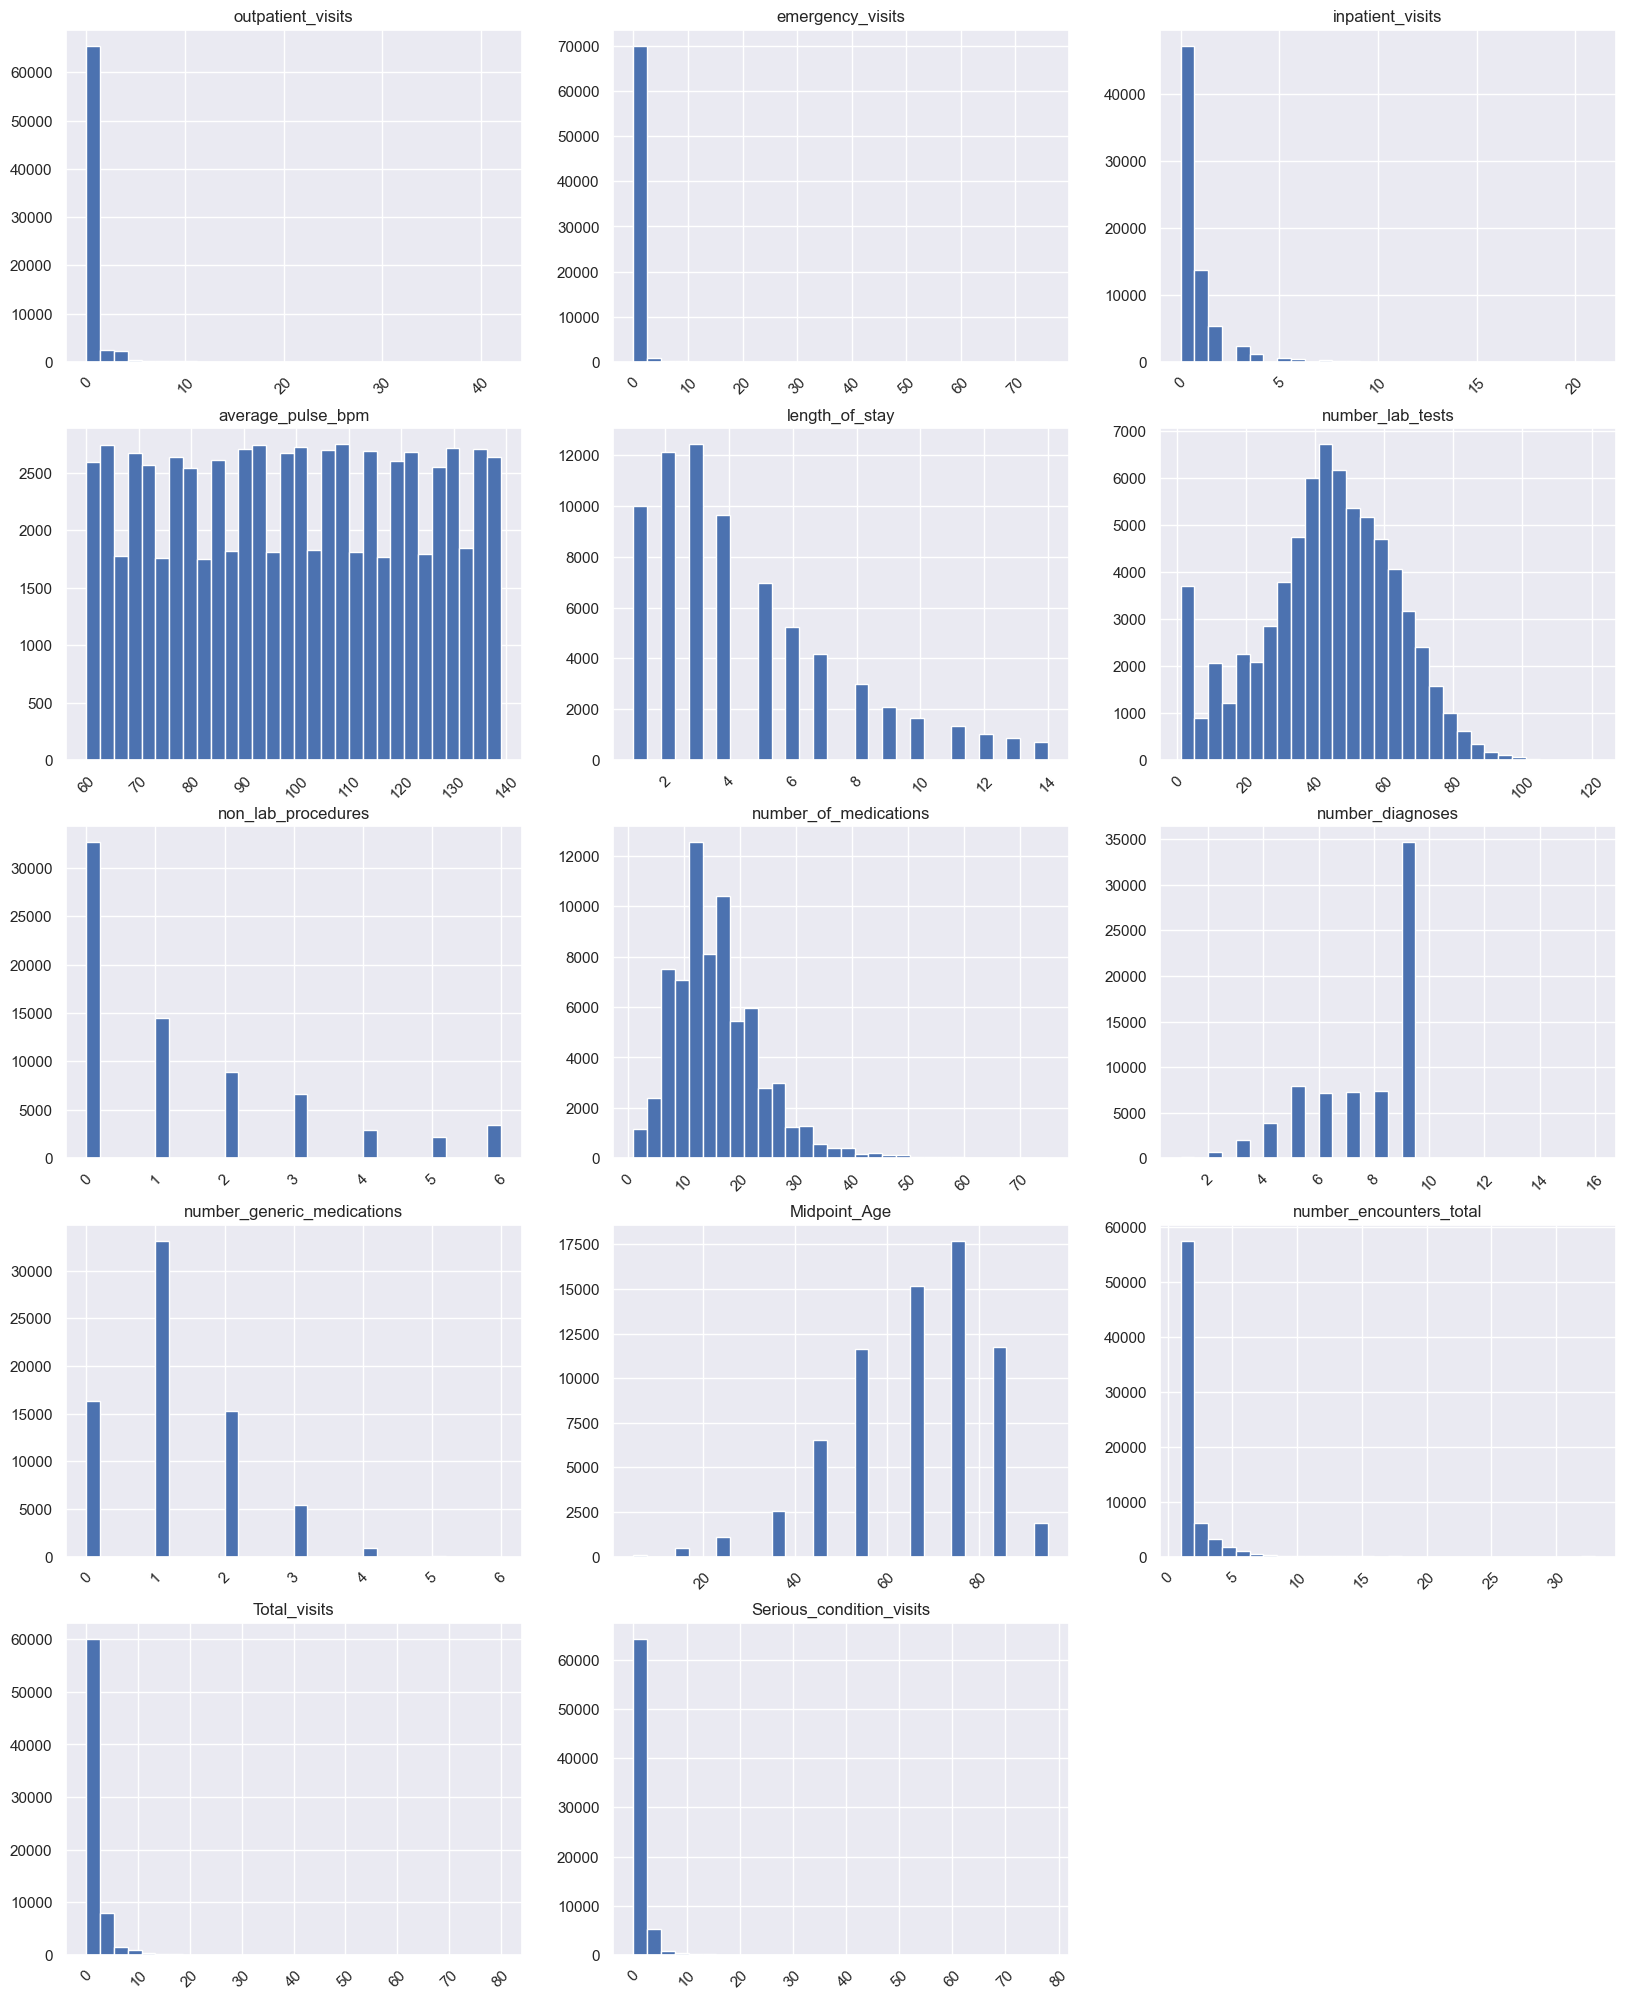

In [21]:

sns.set()

# Calculate the number of rows needed with a max of 3 histograms per row
n_cols = 3
n_rows = ceil(len(metric_features.columns) / n_cols)

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  # Adjust the figure size as needed

# Flatten the axes array for easy iteration and remove any excess axes
axes = axes.flatten()
for i in range(len(metric_features.columns), len(axes)):
    fig.delaxes(axes[i])

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes, metric_features.columns):  # Iterate over column names
    ax.hist(metric_features[feat], bins=30)  # Set a standard number of bins
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



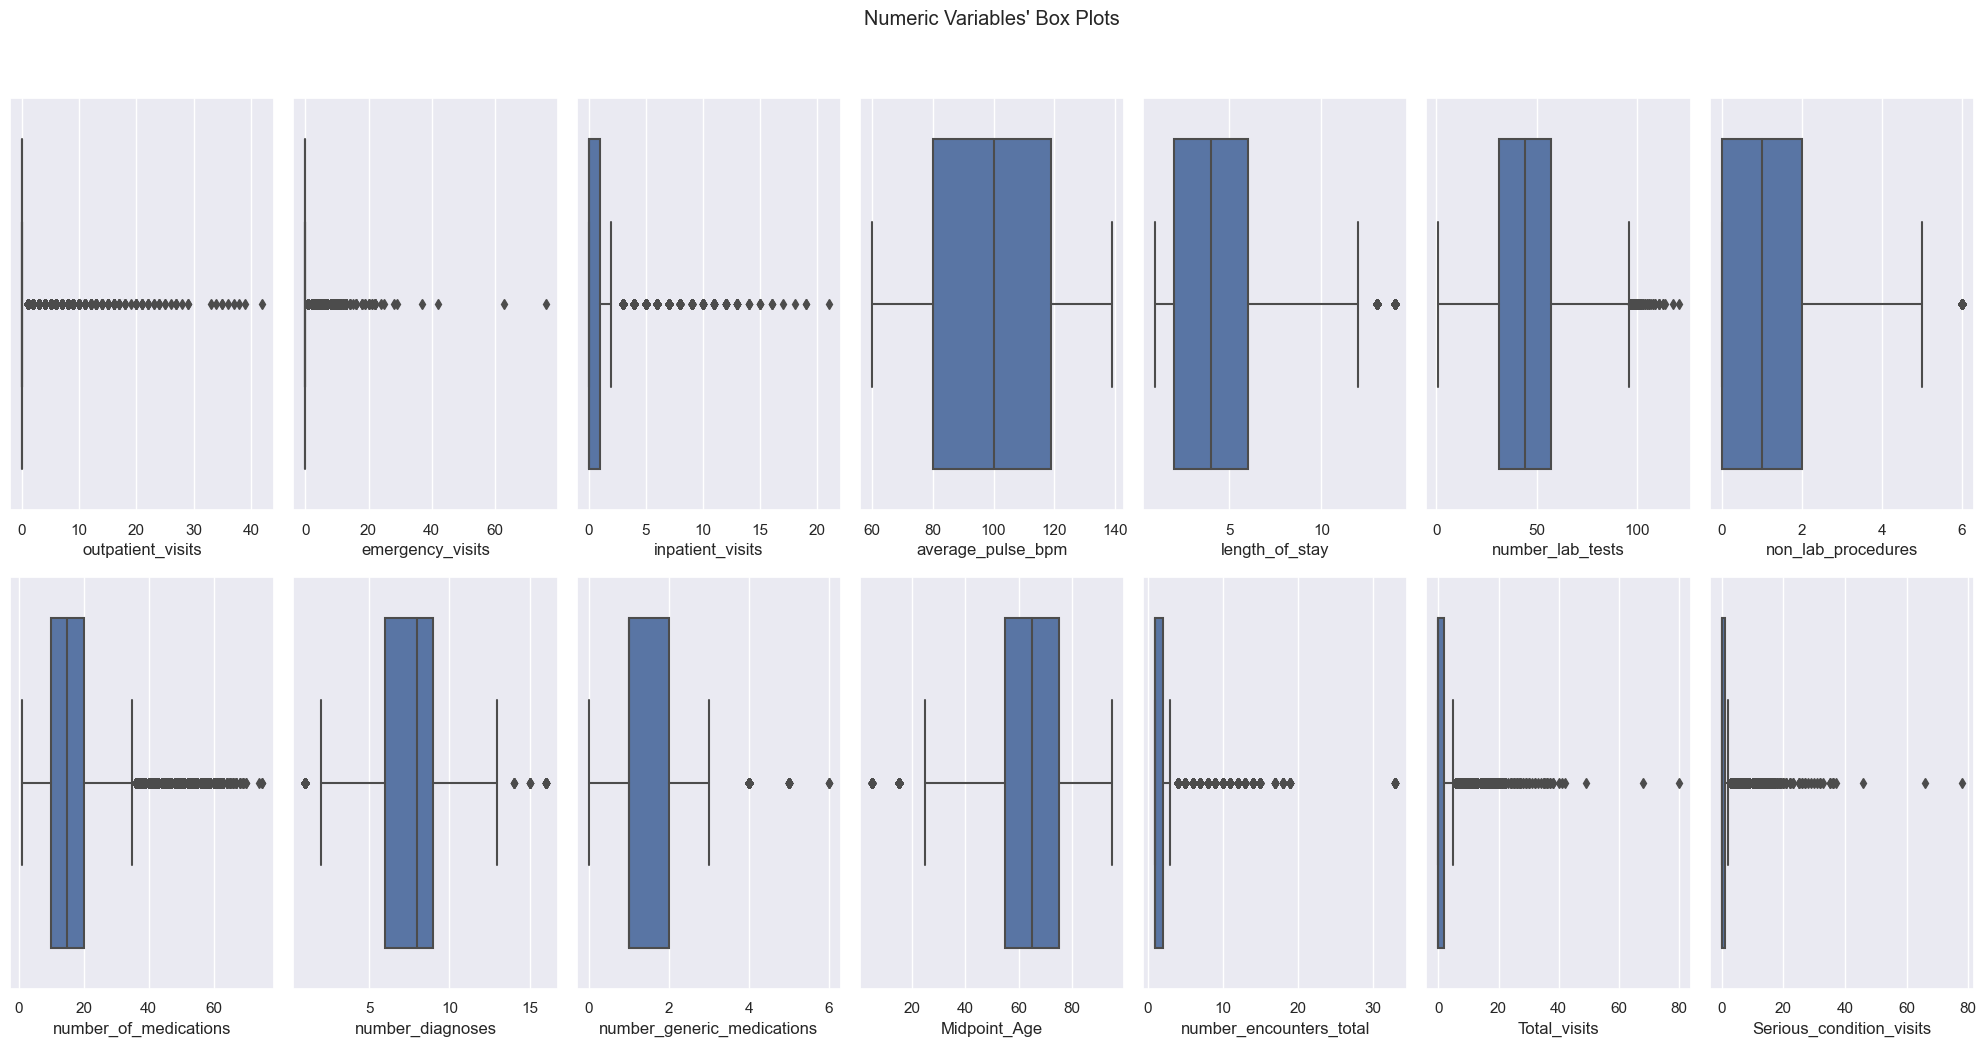

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# Assuming 'metric_features' is a DataFrame with your data
# Replace 'metric_features' with the actual name of your DataFrame

# sns.set() is used to set the aesthetic parameters in one step.
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed.
# The 'ceil' function should be from the 'math' library.
fig, axes = plt.subplots(2, ceil(len(metric_features.columns) / 2), figsize=(20, 11))

# Flatten the axes array for easy iteration.
axes = axes.flatten()

# Plot data.
# Iterate across axes objects and associate each box plot.
for ax, feat in zip(axes, metric_features.columns):  # Use .columns to iterate over column names
    sns.boxplot(x=metric_features[feat], ax=ax)  # Plot boxplot for each feature

# Layout.
# Add a centered title to the figure.
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

# Adjust layout for a clean look.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot.
plt.show()


### Non-metrical

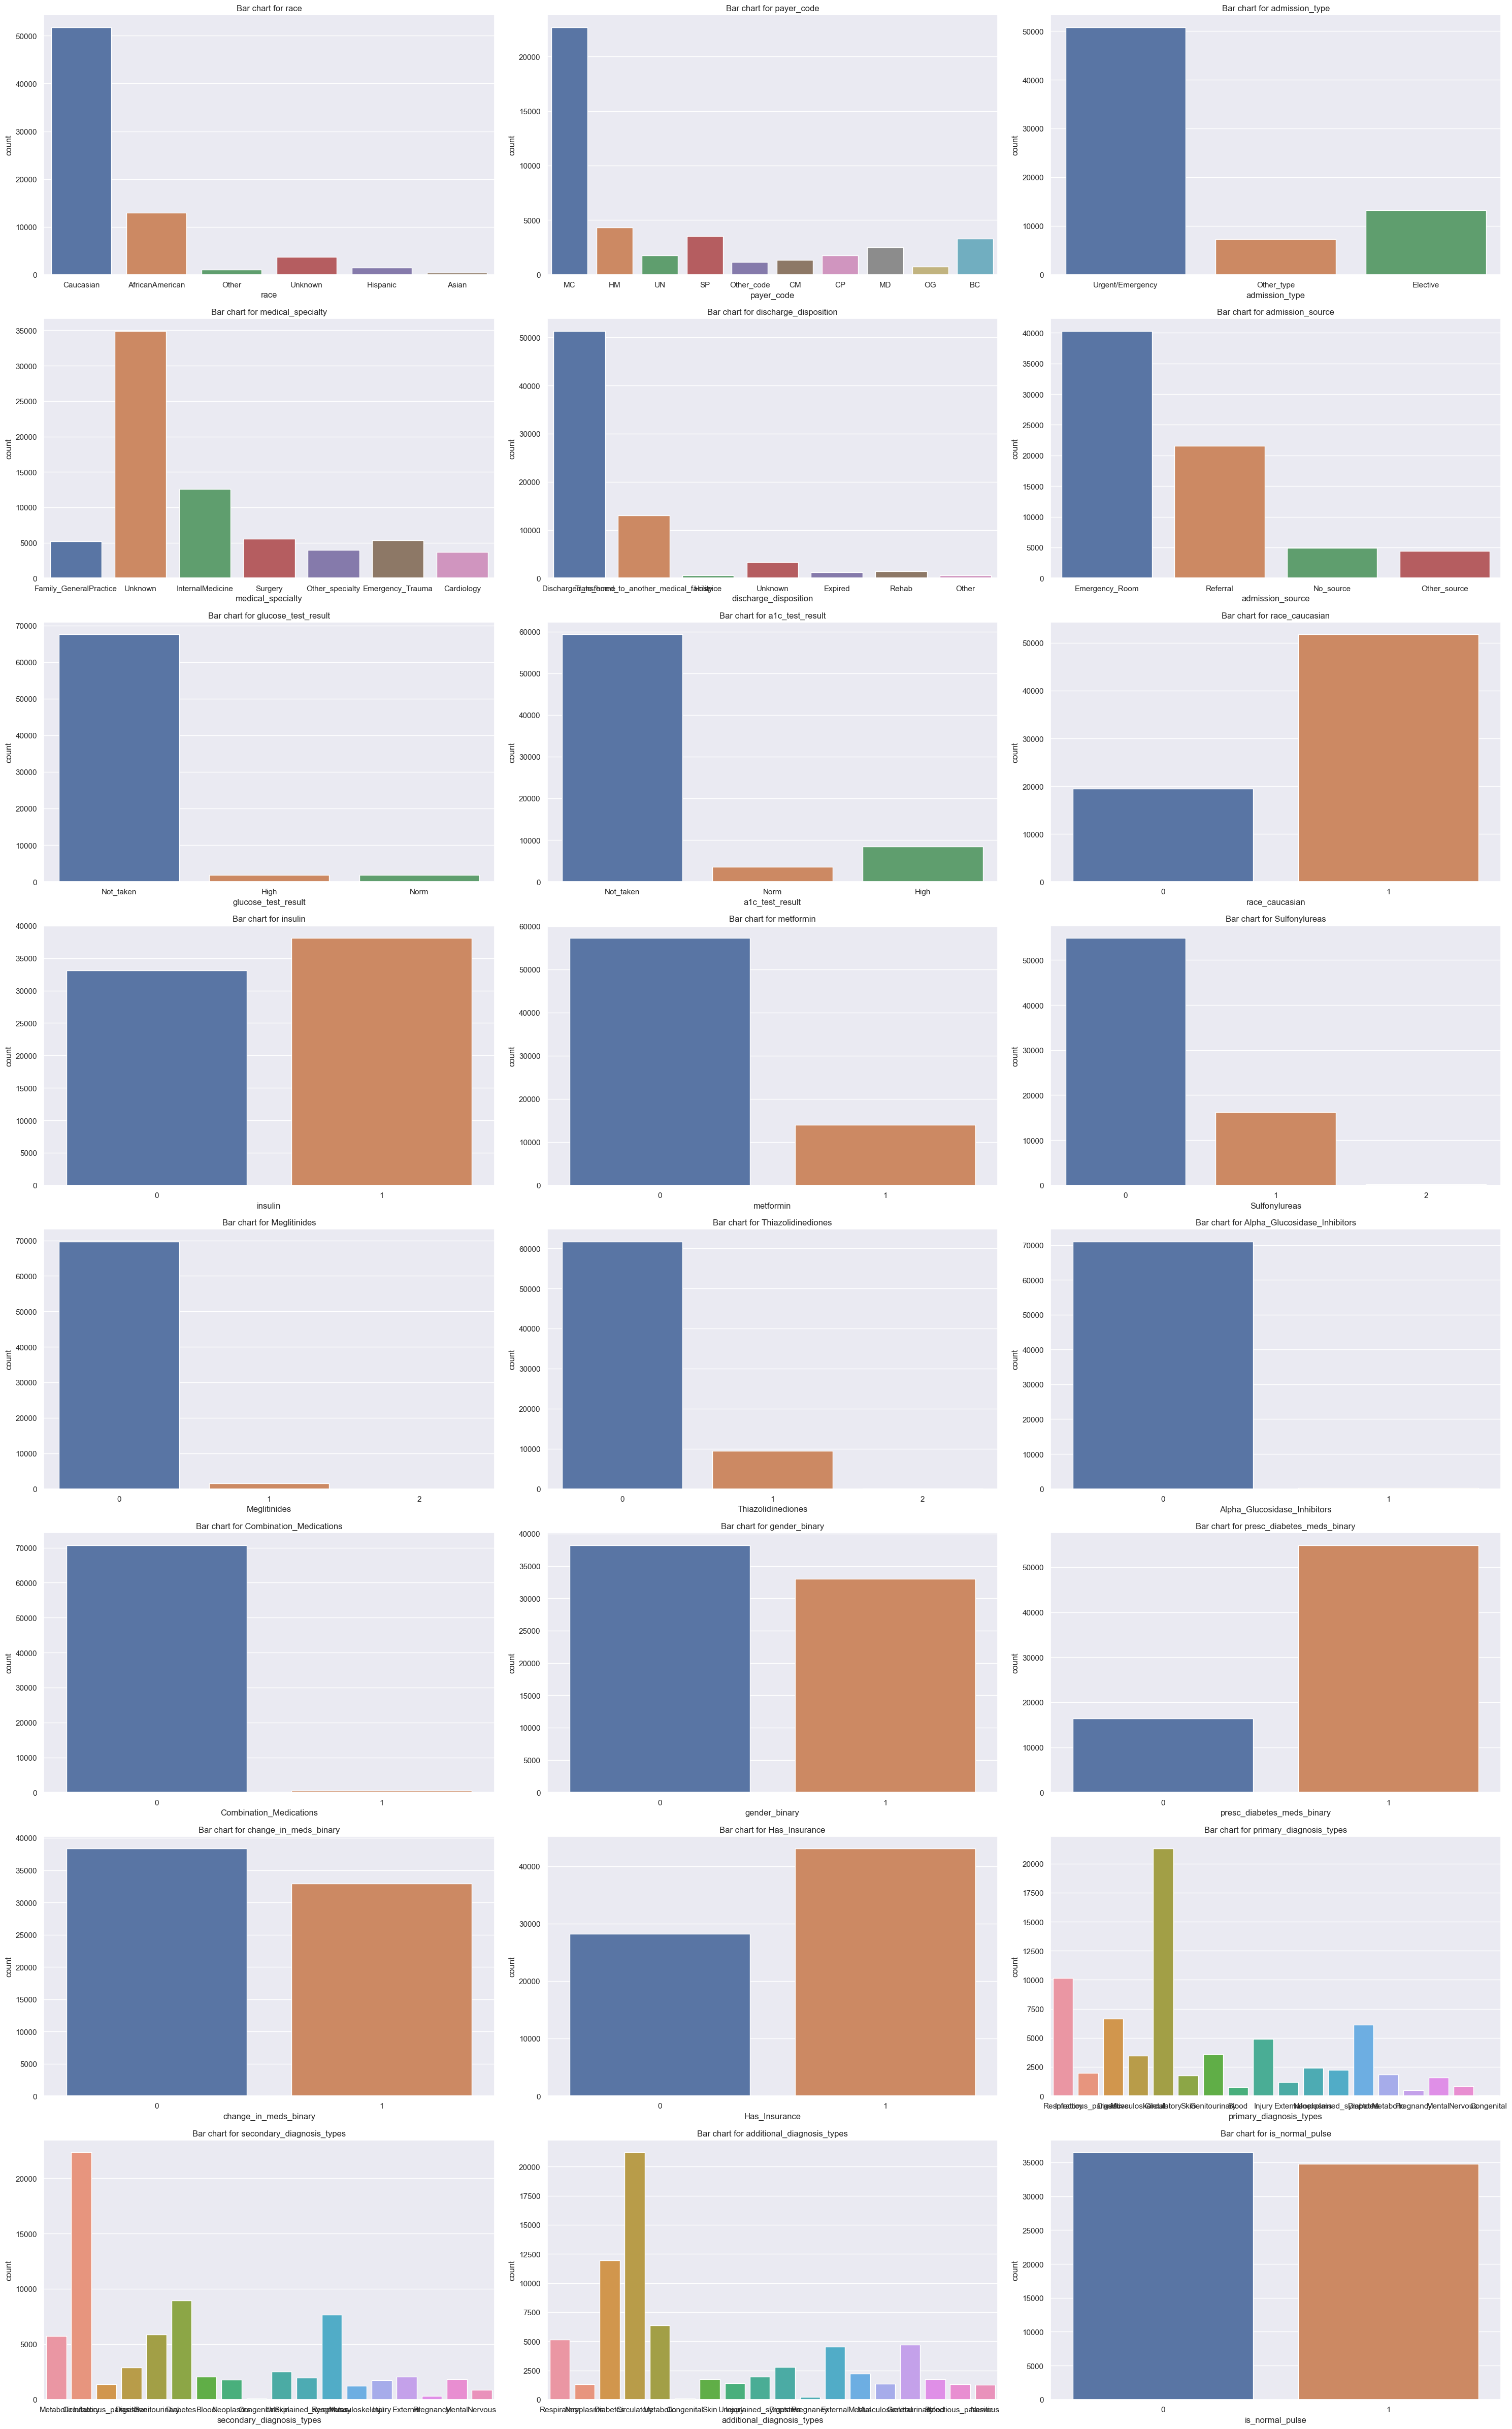

In [31]:
n_features = len(non_metric_features.columns)
n_rows = (n_features + 2) // 3  # Calculate the number of rows needed

# Set the size of the entire figure
plt.figure(figsize=(30, 6 * n_rows)) 

# Loop through the features and create subplots
for i, feature in enumerate(non_metric_features.columns):
    plt.subplot(n_rows, 3, i+1)  # (n_rows, 3) subplots, position i+1
    sns.countplot(x=feature, data=non_metric_features)
    plt.title(f'Bar chart for {feature}')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all subplots neatly
plt.show()

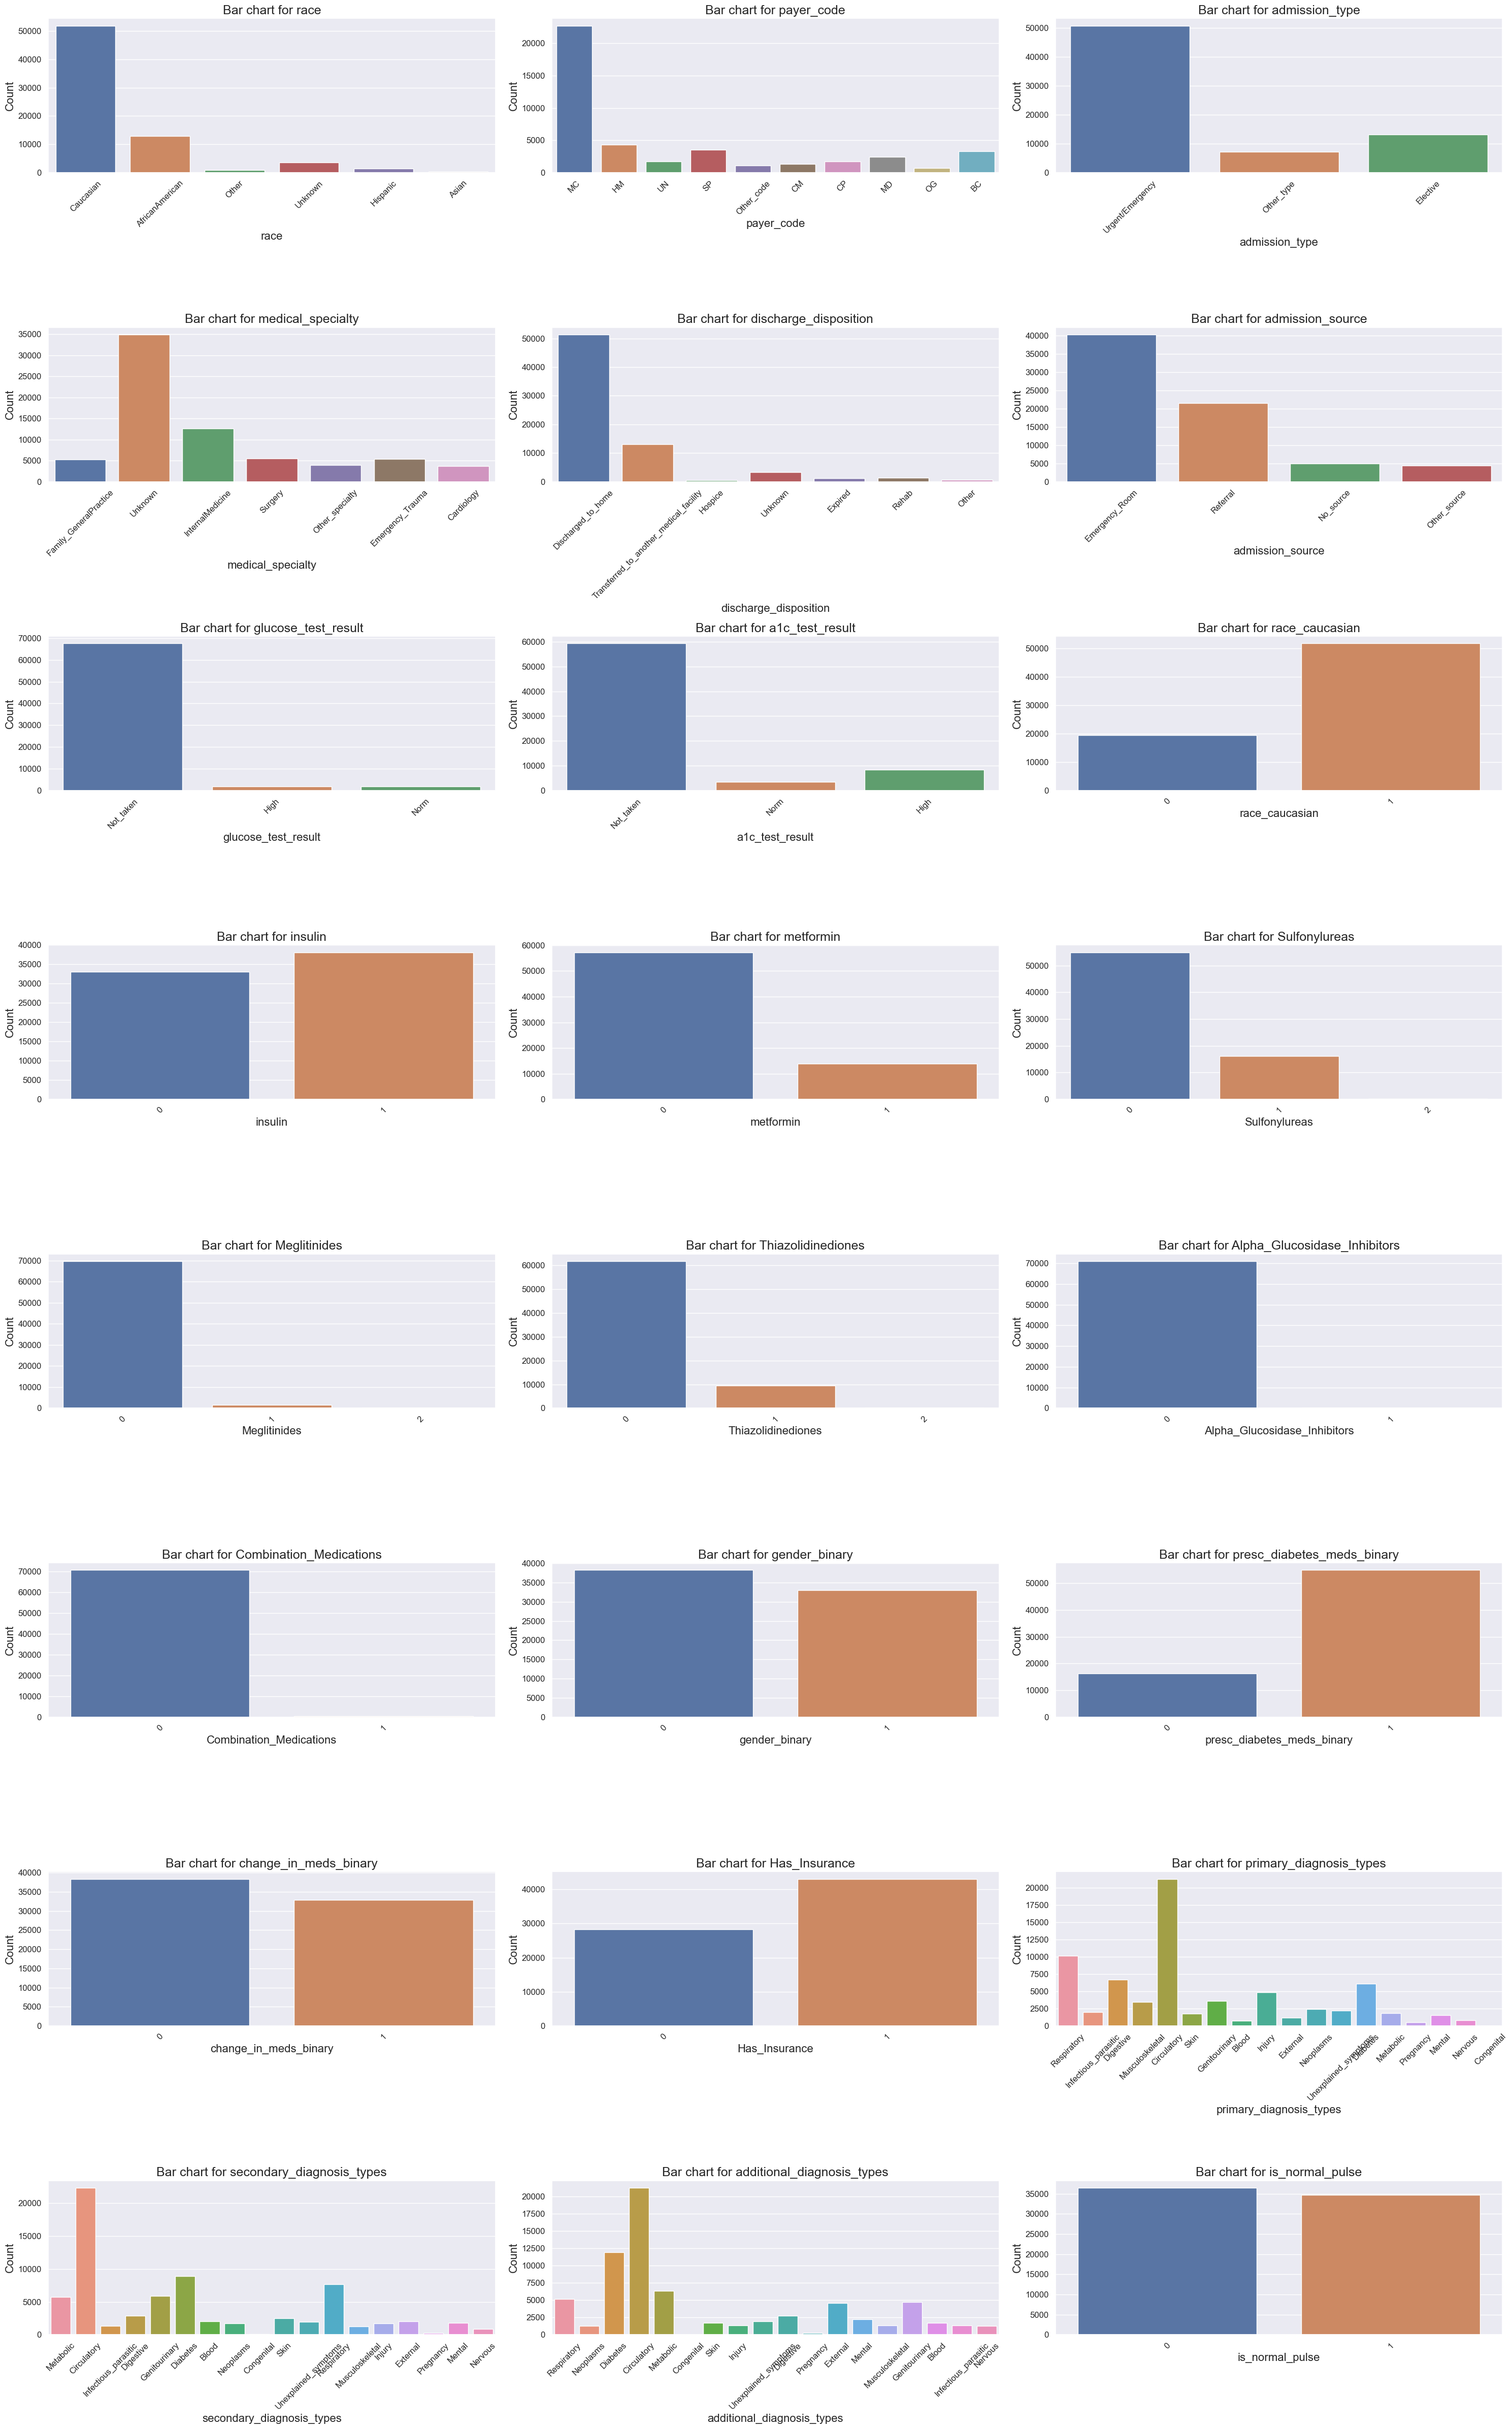

In [33]:
n_features = len(non_metric_features.columns)
n_rows = (n_features + 2) // 3  # Calculate the number of rows needed

# Set the size of the entire figure
plt.figure(figsize=(30, 6 * n_rows))

# Set larger font size for titles and labels
plt.rc('axes', titlesize=18)     # Axes title
plt.rc('axes', labelsize=14)     # X and Y labels
plt.rc('xtick', labelsize=12)    # X tick labels
plt.rc('ytick', labelsize=12)    # Y tick labels

# Loop through the features and create subplots
for i, feature in enumerate(non_metric_features.columns):
    plt.subplot(n_rows, 3, i+1)  # (n_rows, 3) subplots, position i+1
    ax = sns.countplot(x=feature, data=non_metric_features)
    ax.set_title(f'Bar chart for {feature}')
    ax.set_xlabel(feature, fontsize=16)  # Set a larger font size for x-axis labels
    ax.set_ylabel('Count', fontsize=16)  # Set a larger font size for y-axis labels
    
    # Rotate x labels if they overlap
    for item in ax.get_xticklabels():
        item.set_rotation(45)

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all subplots neatly
plt.show()

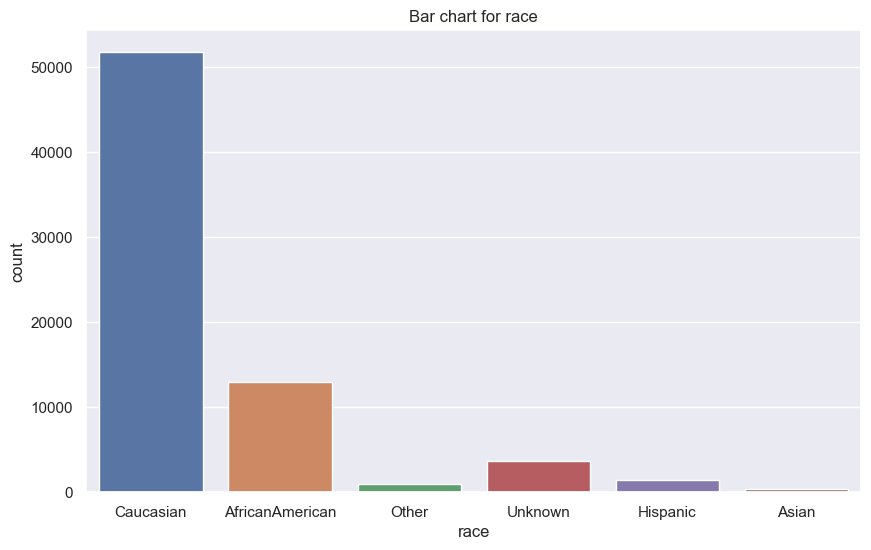

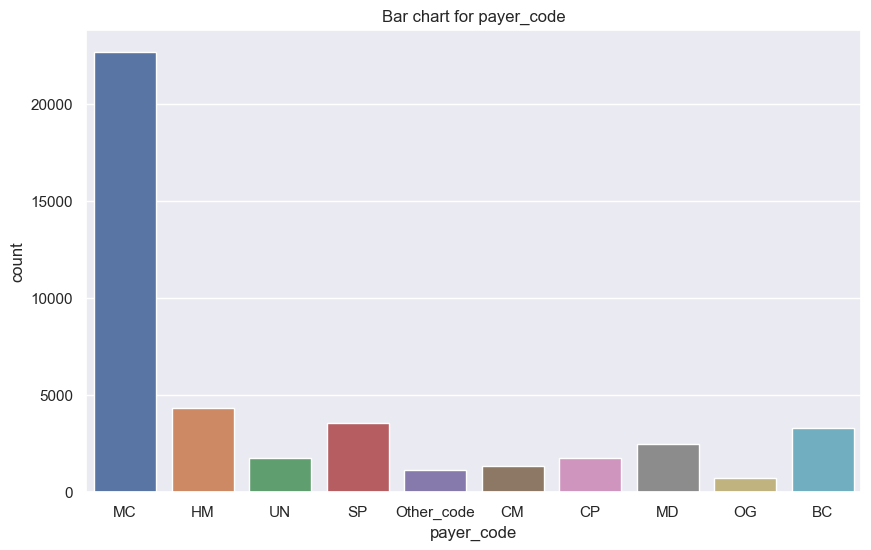

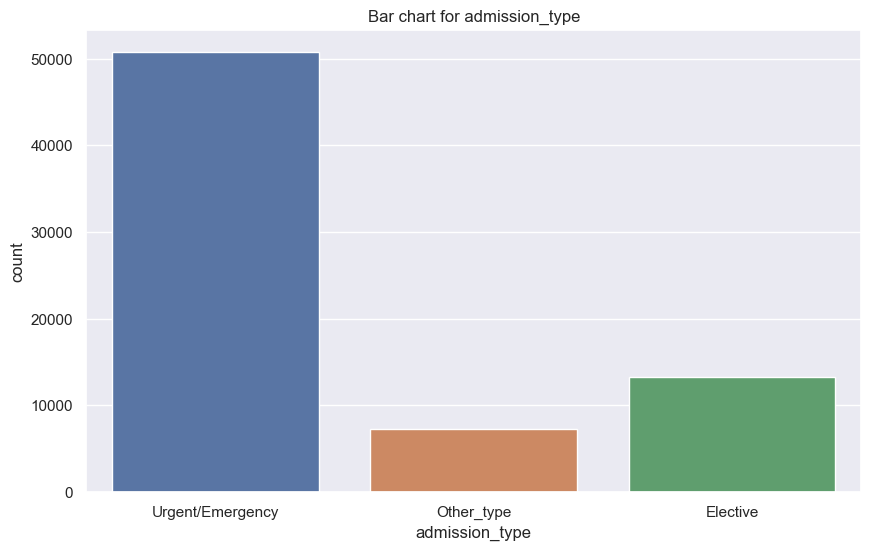

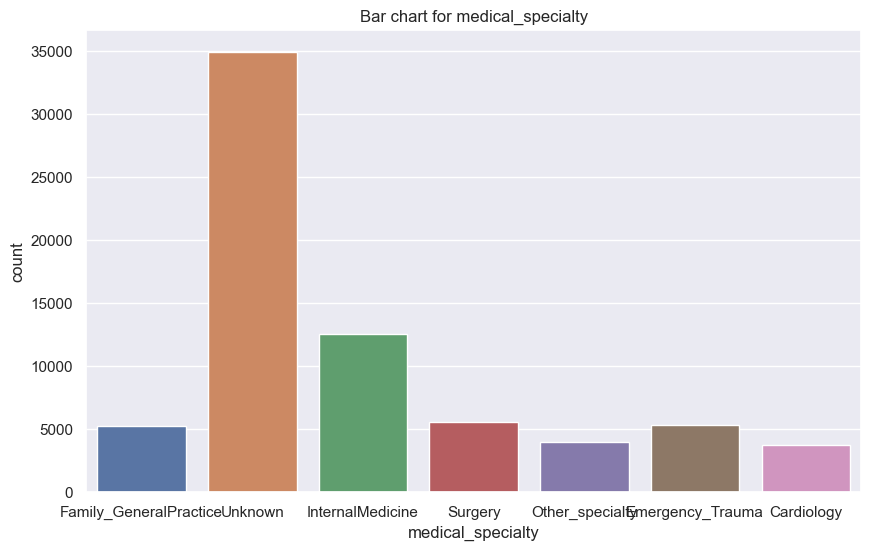

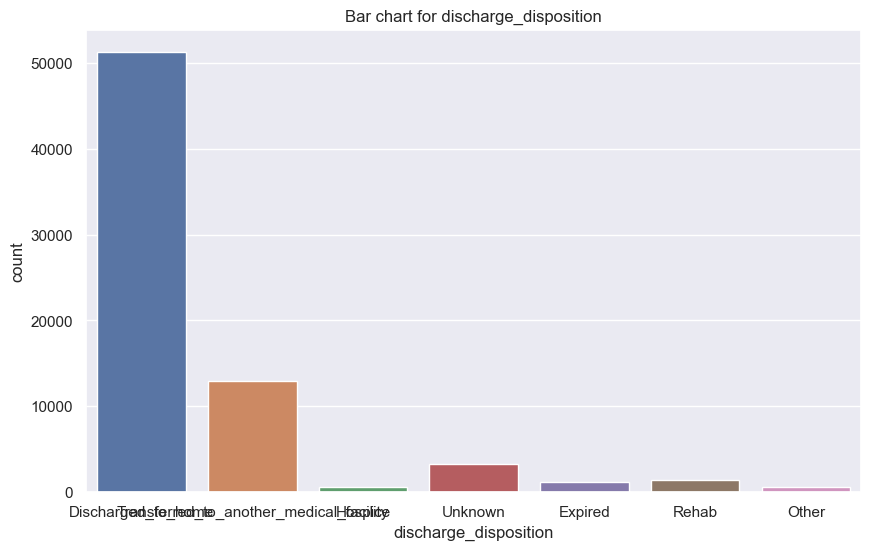

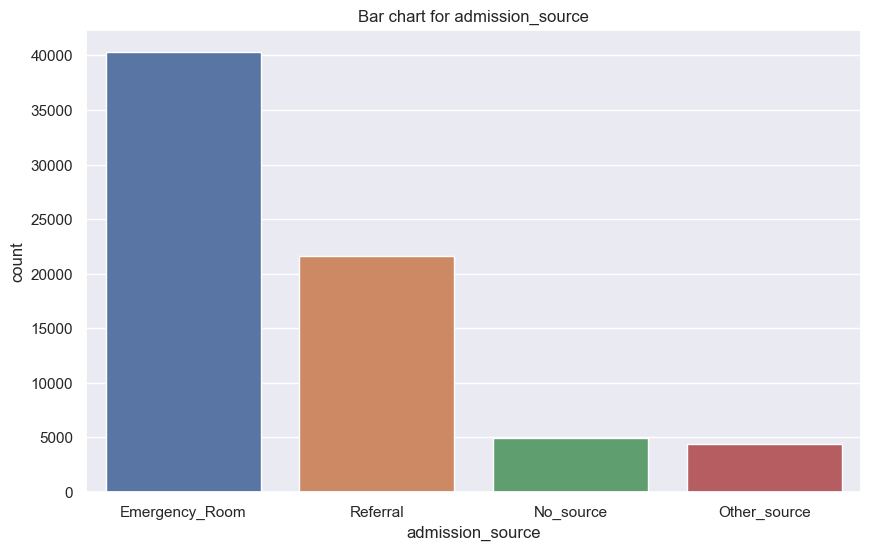

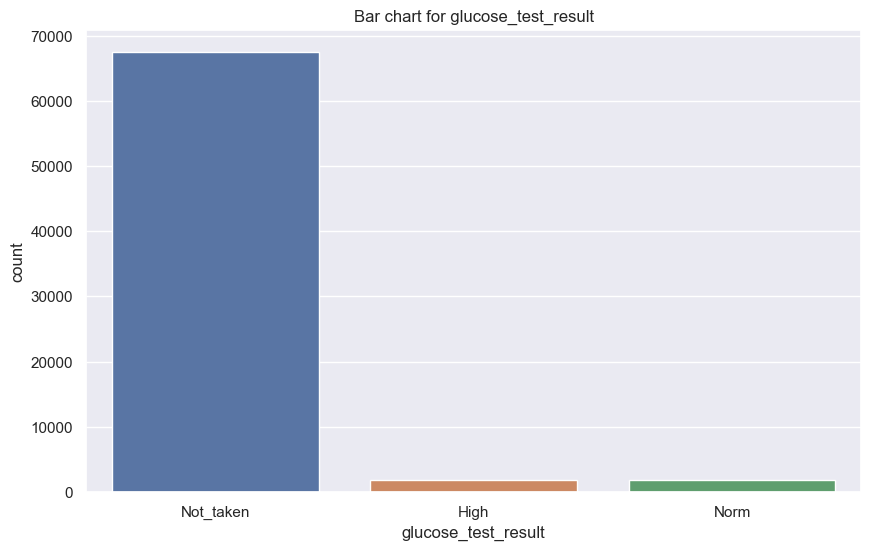

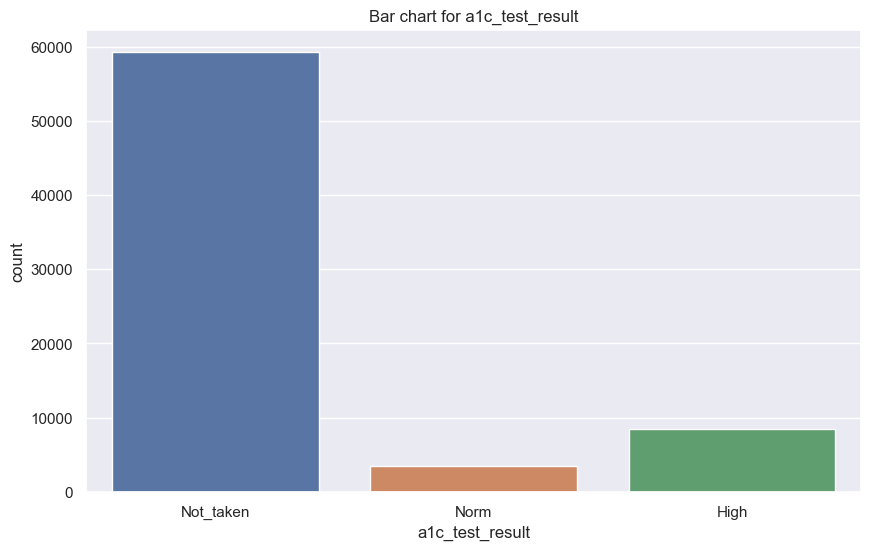

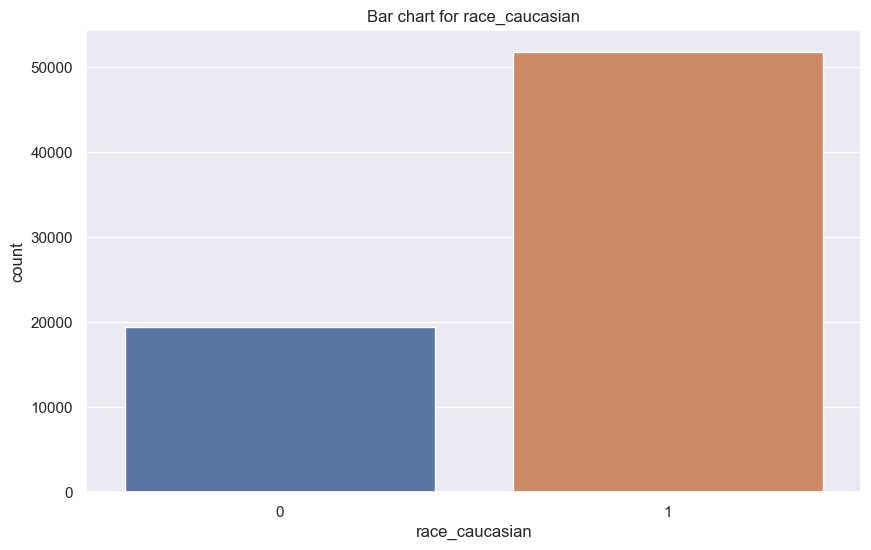

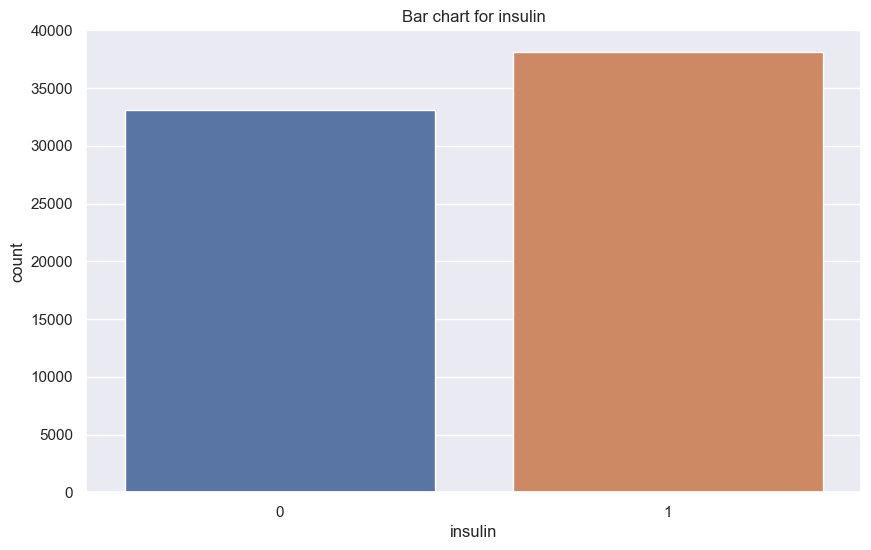

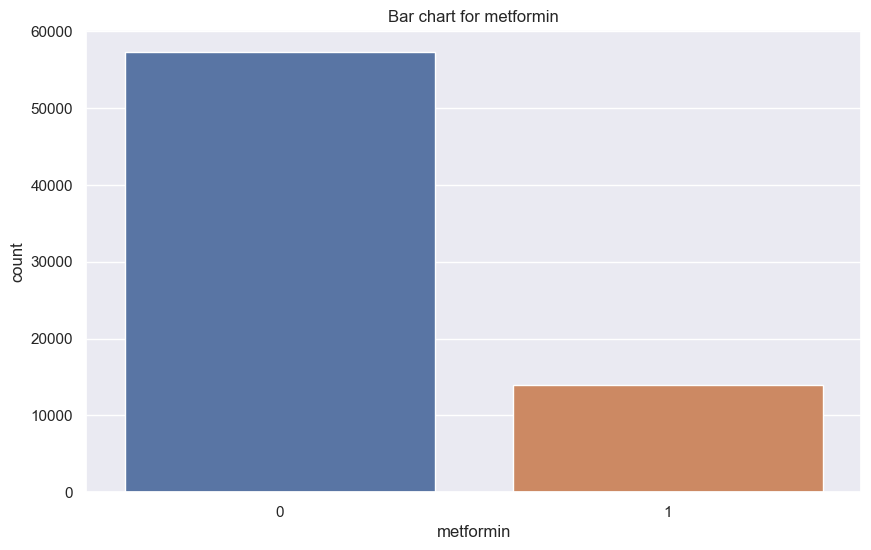

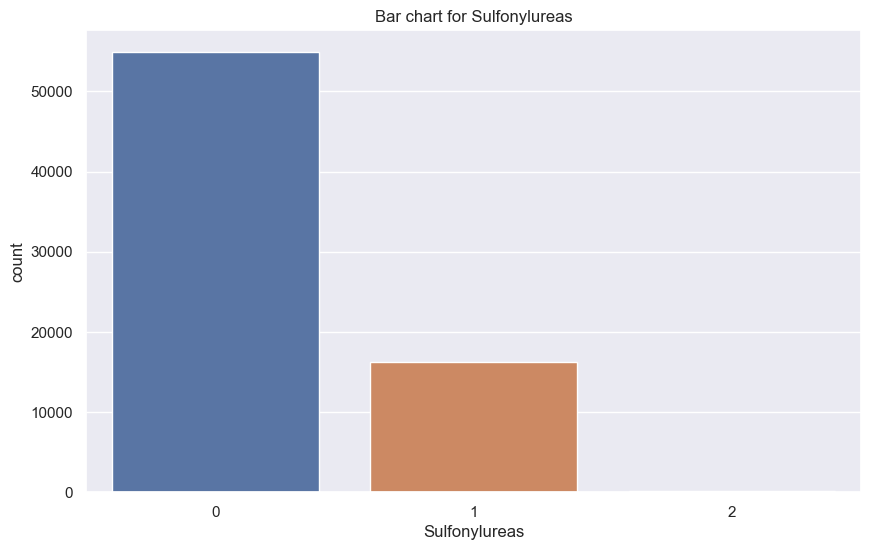

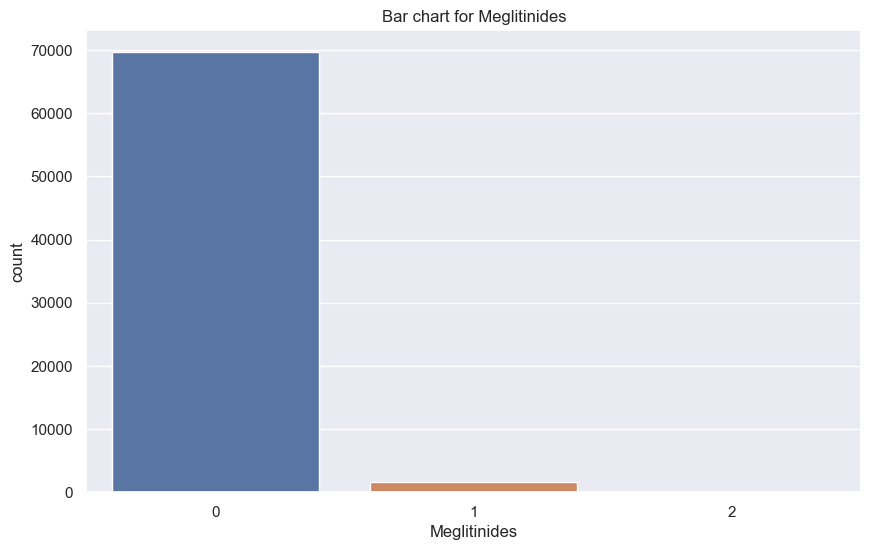

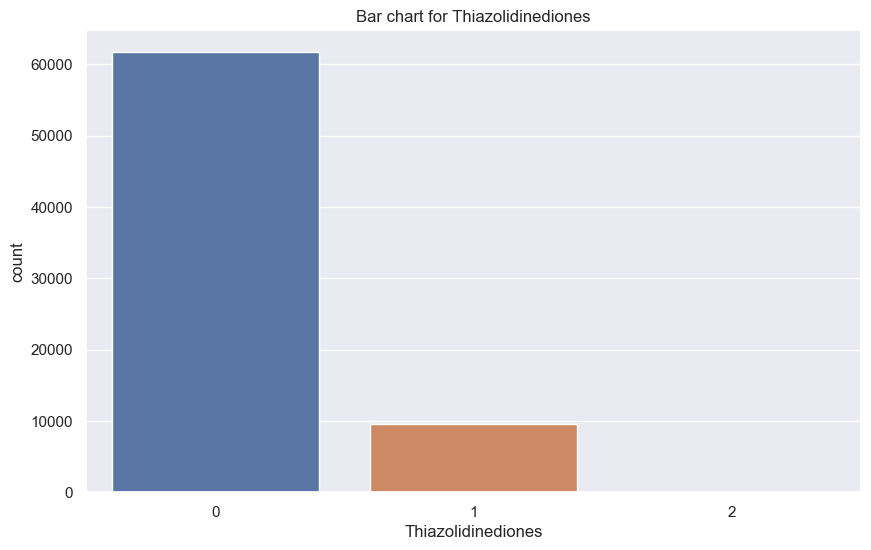

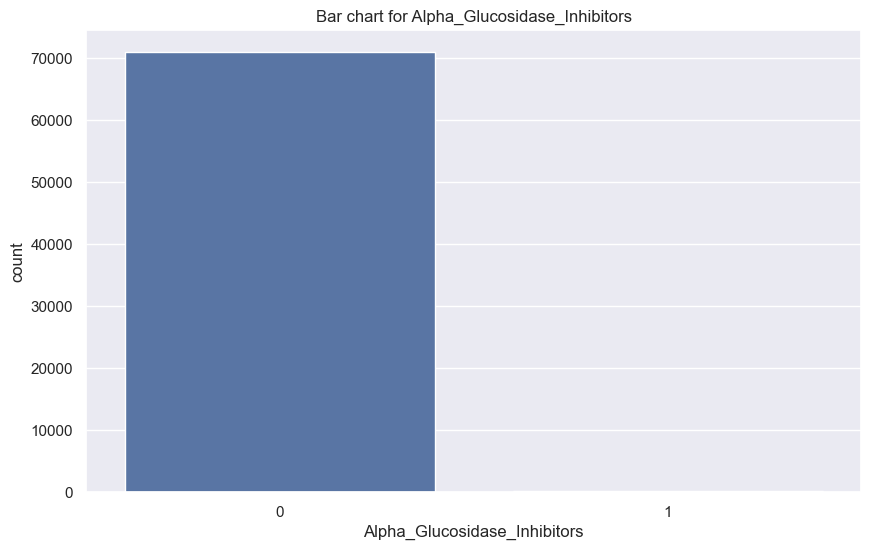

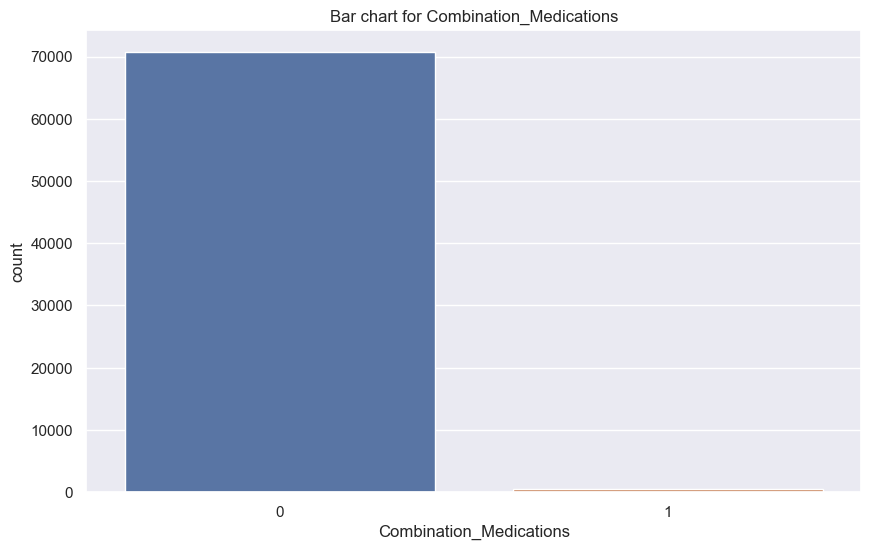

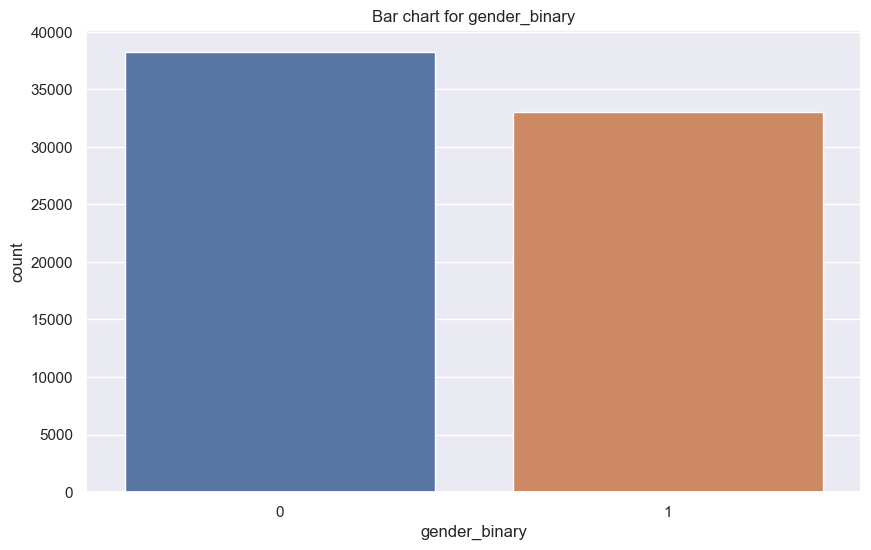

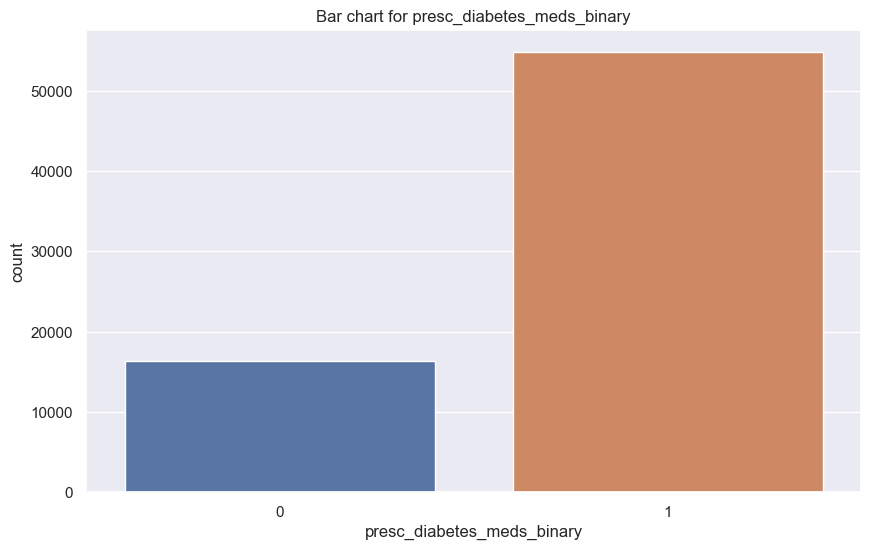

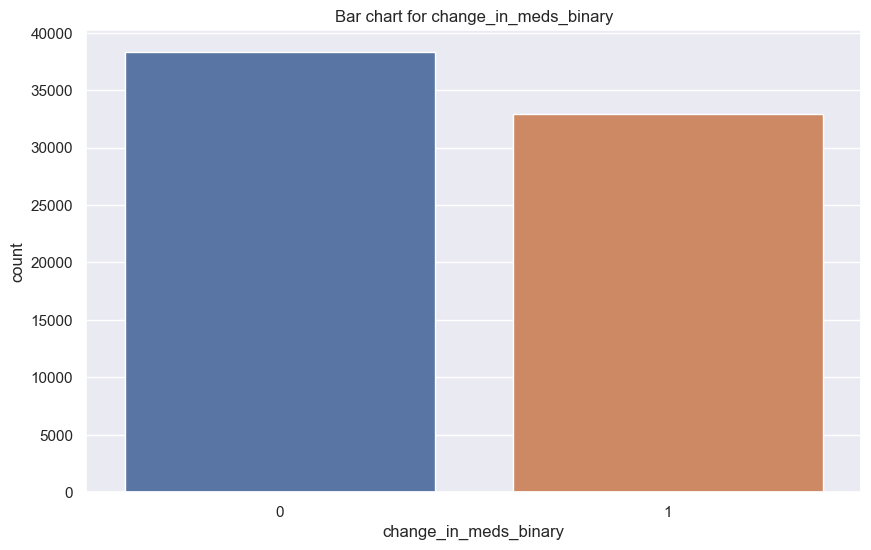

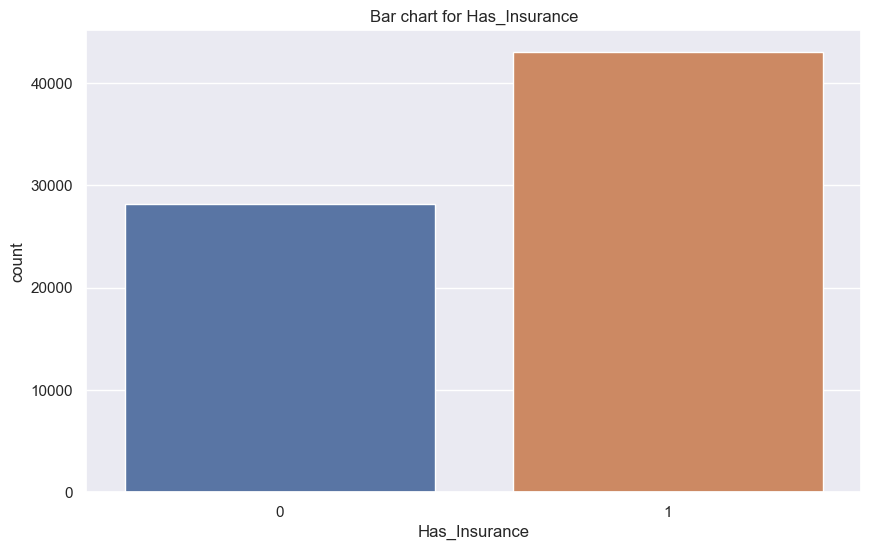

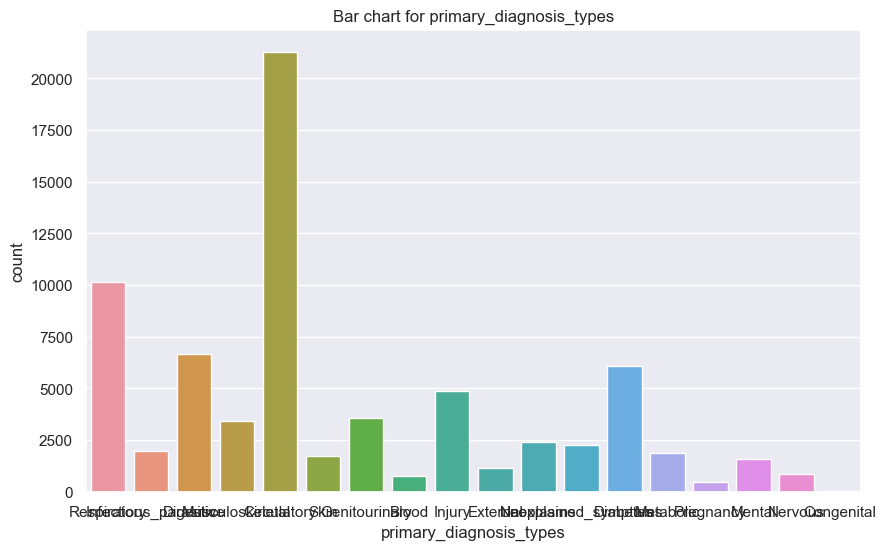

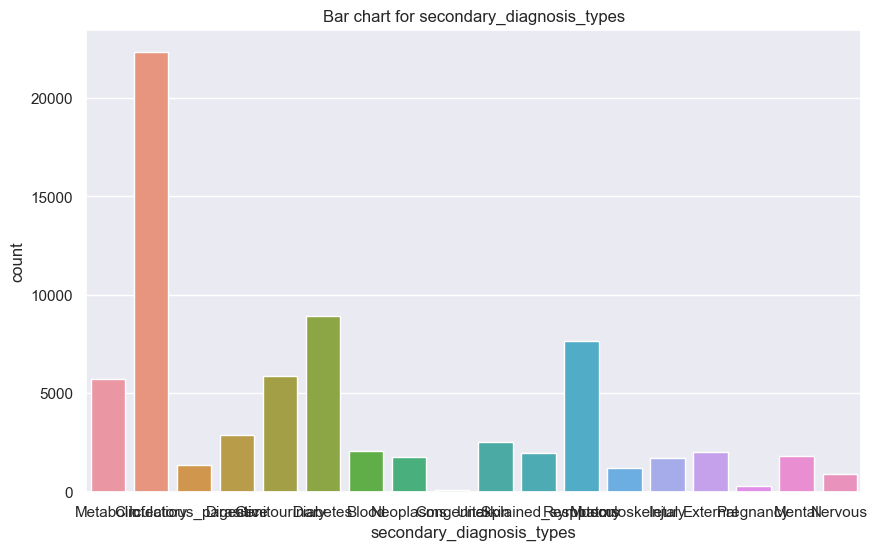

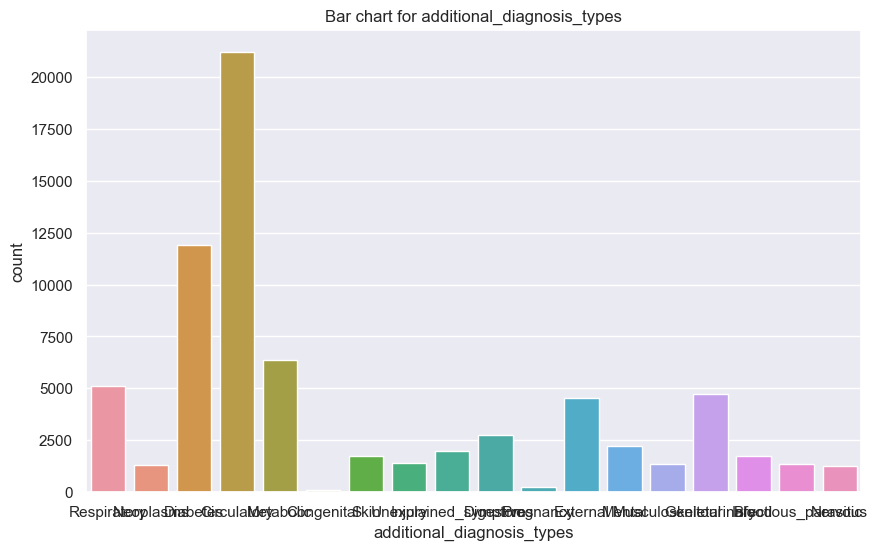

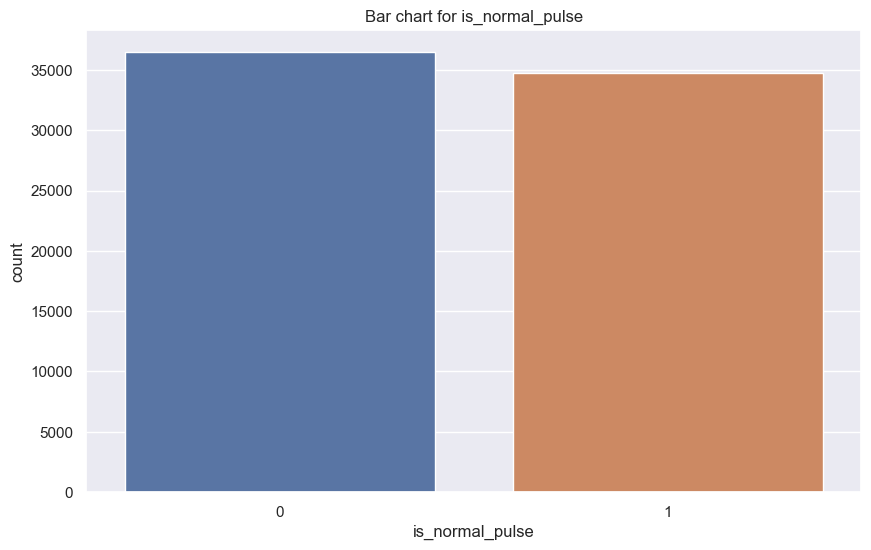

In [24]:
for feature in non_metric_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=non_metric_features)
    plt.title(f'Bar chart for {feature}')
    plt.show()

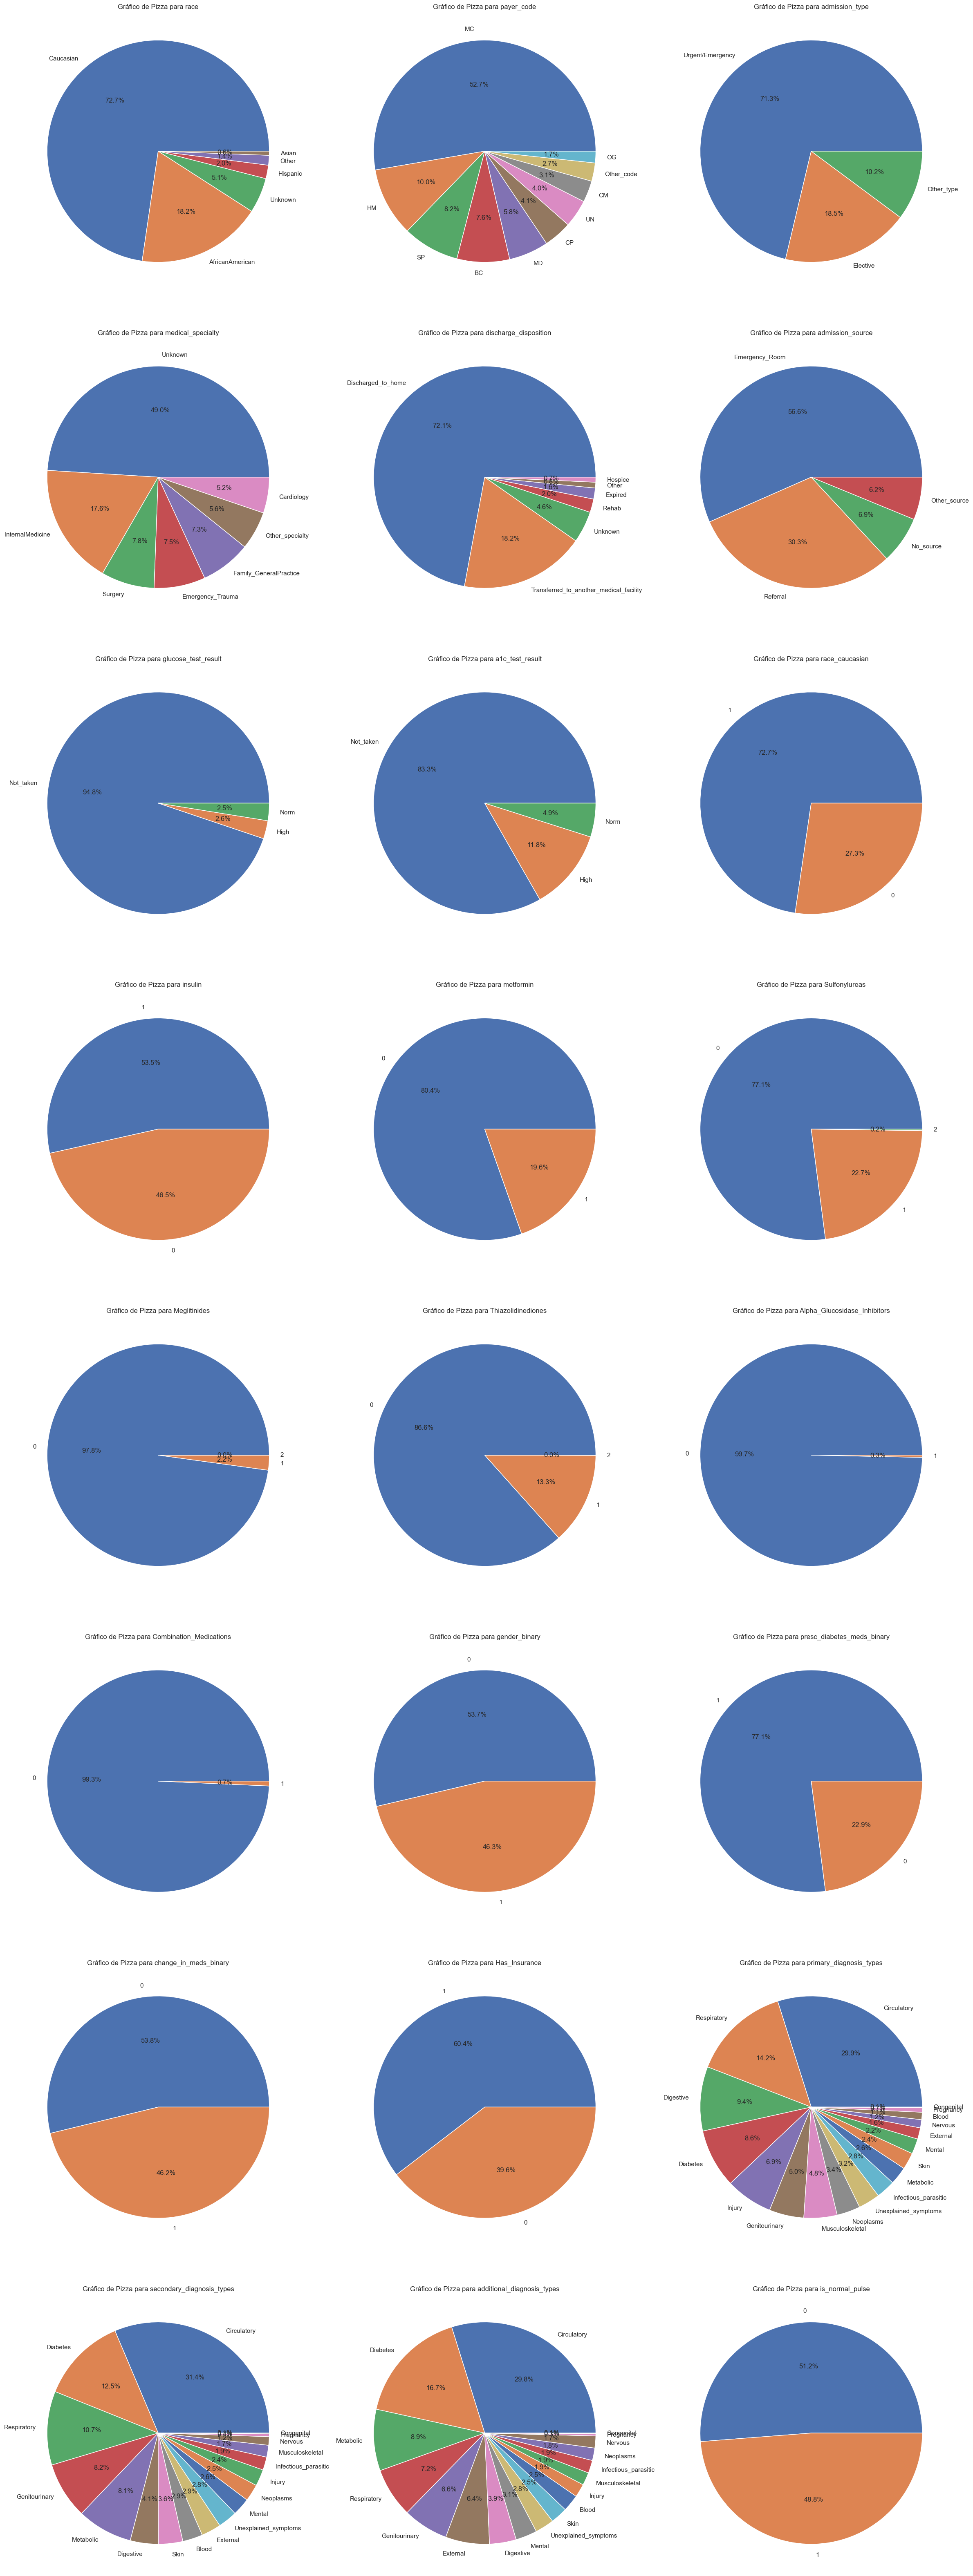

In [25]:
n_features = len(non_metric_features.columns)
n_rows = (n_features + 2) // 3  # Calcula o número de linhas necessárias

# Define o tamanho da figura inteira
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 8 * n_rows))  # 24 = 3*8 (largura de cada subplot)
axes = axes.flatten()  # Transforma a matriz de eixos em um array unidimensional

# Loop através das features para criar subplots
for i, feature in enumerate(non_metric_features.columns):
    non_metric_features[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(f'Gráfico de Pizza para {feature}')
    axes[i].set_ylabel('')  # Para remover o nome da coluna do eixo y

# Remove os eixos extras se o número de features não preencher todos os subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajusta o layout para caber todos os subplots de maneira organizada
plt.tight_layout()
plt.show()

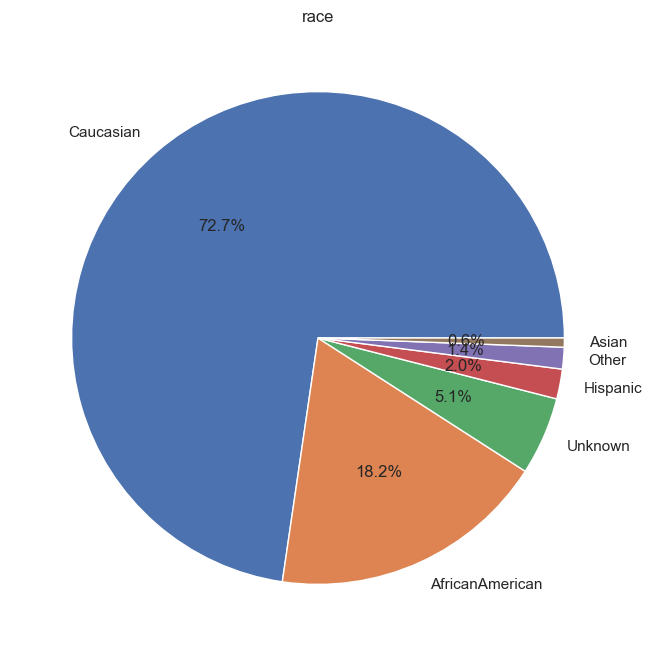

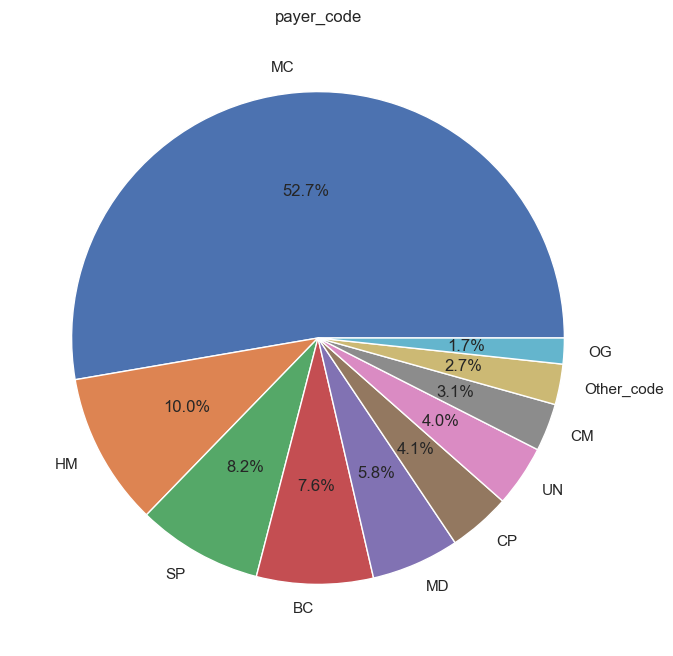

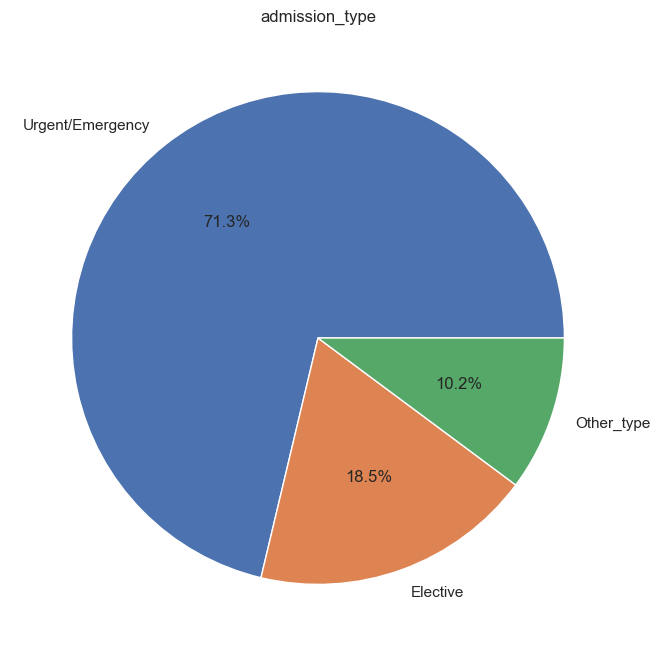

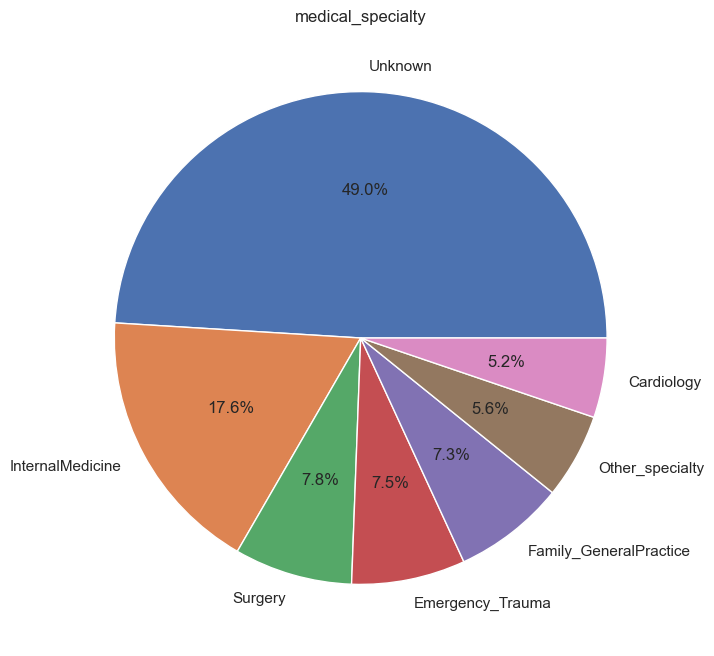

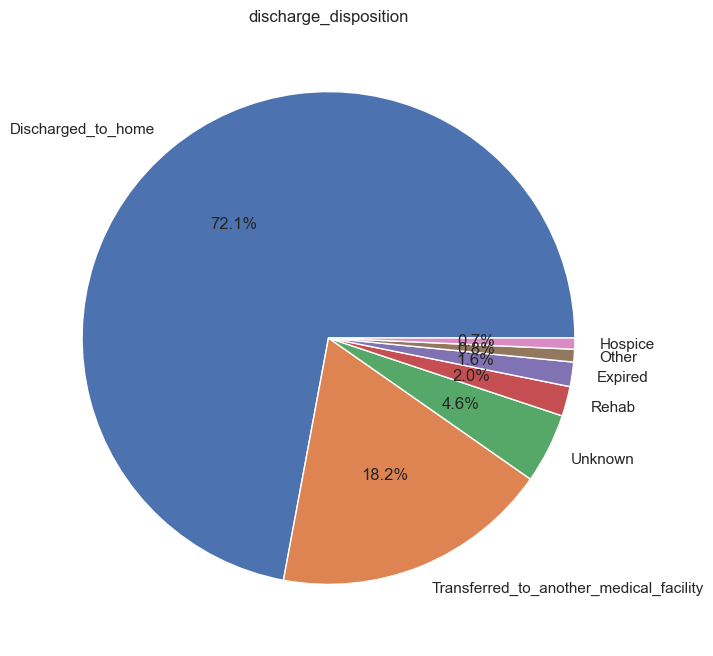

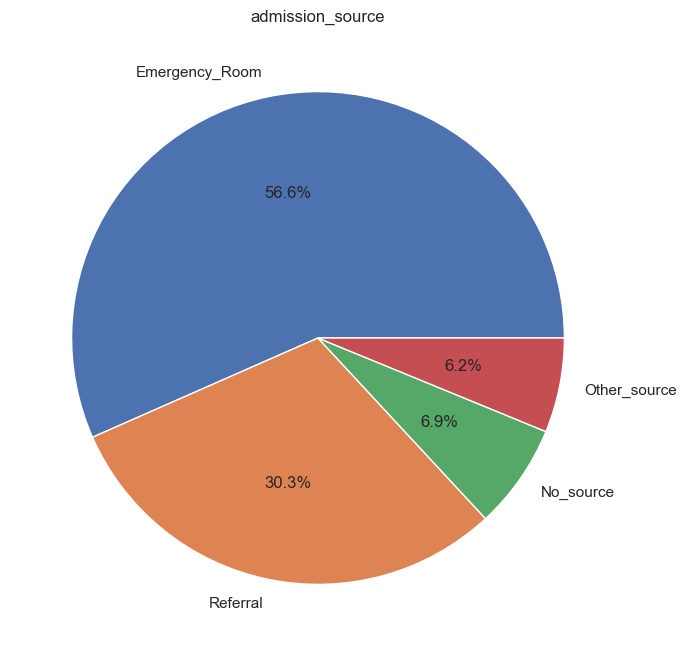

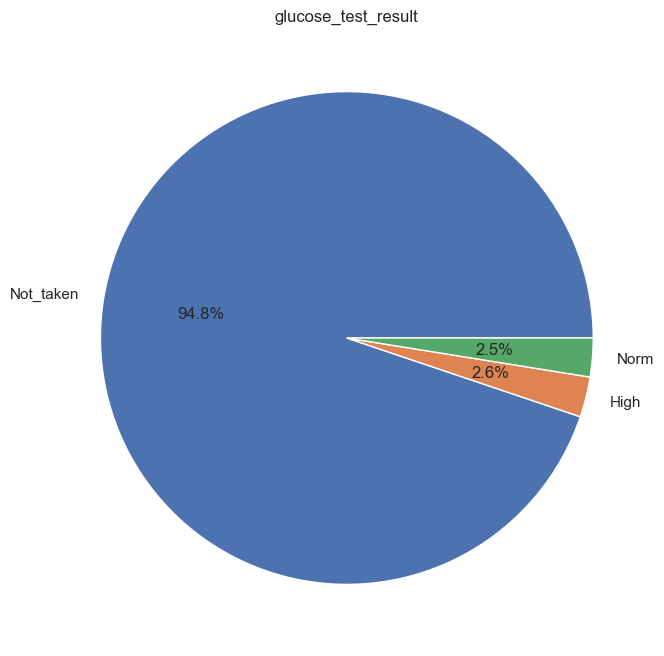

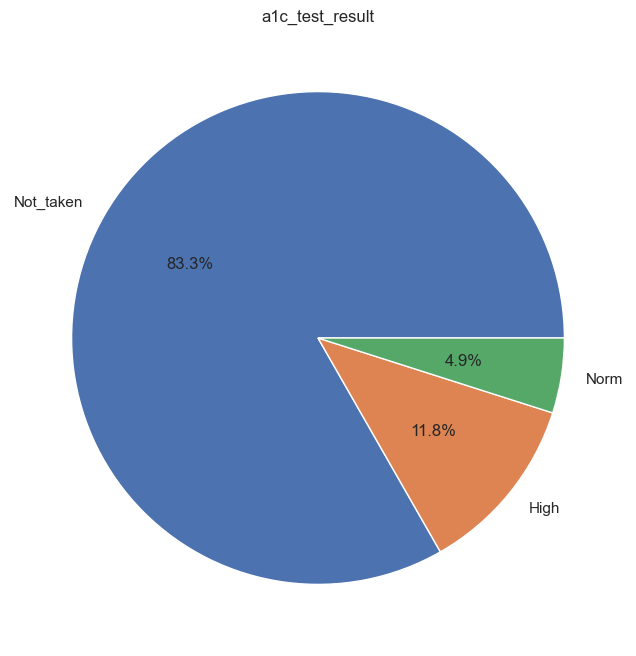

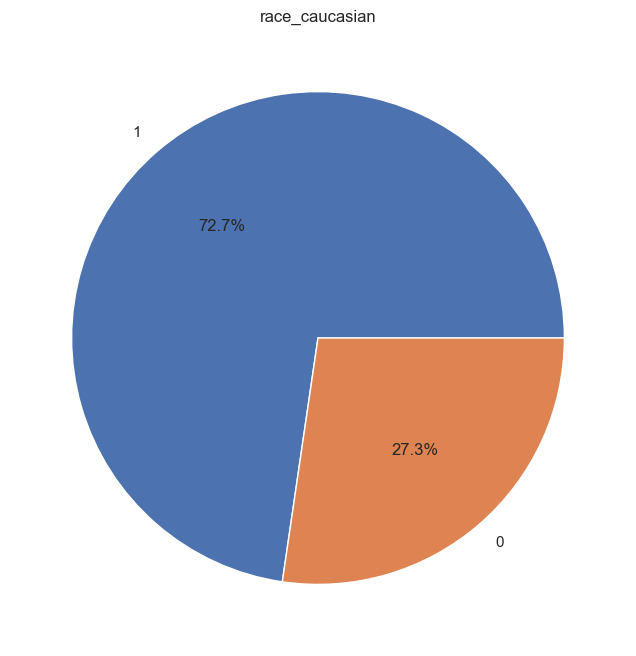

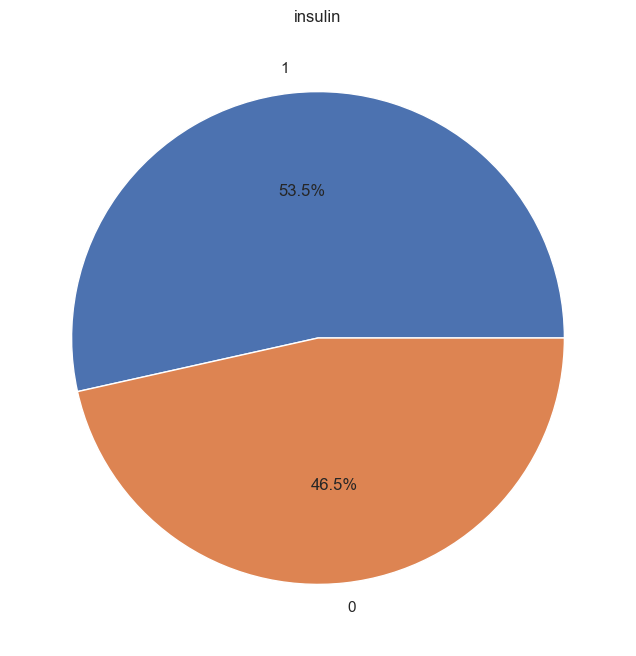

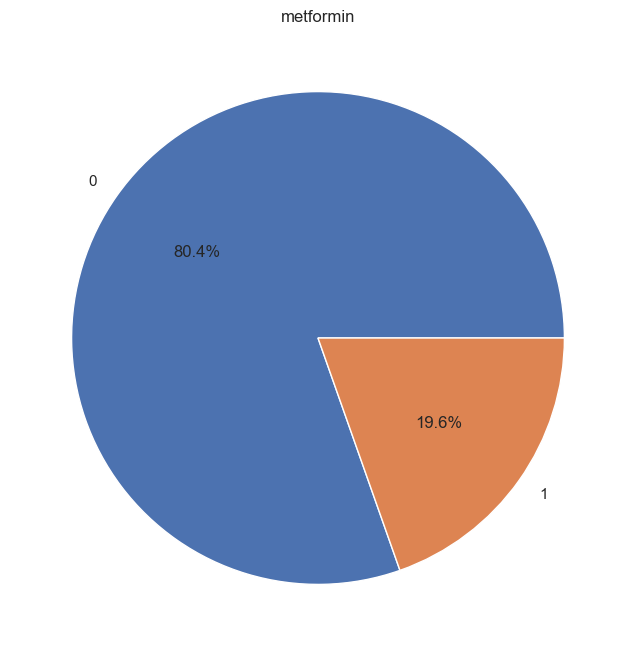

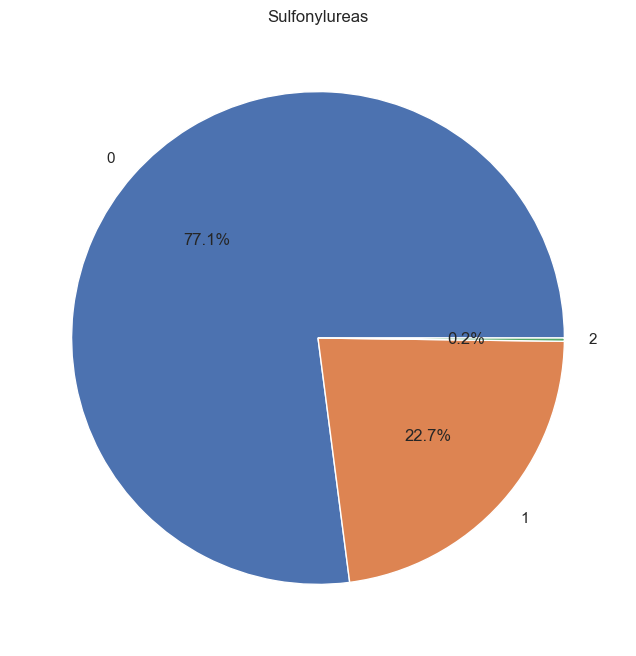

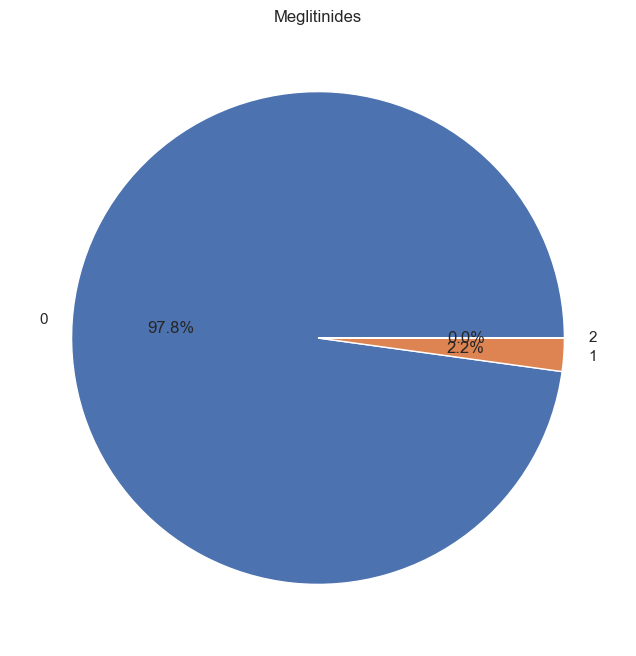

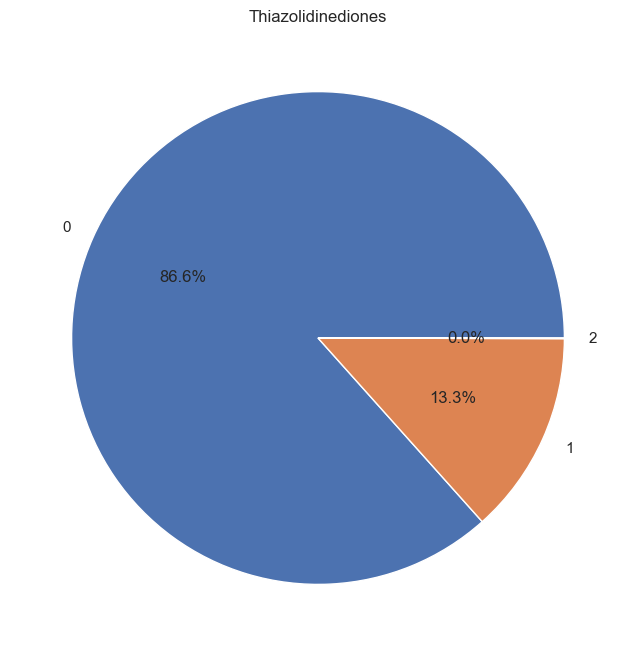

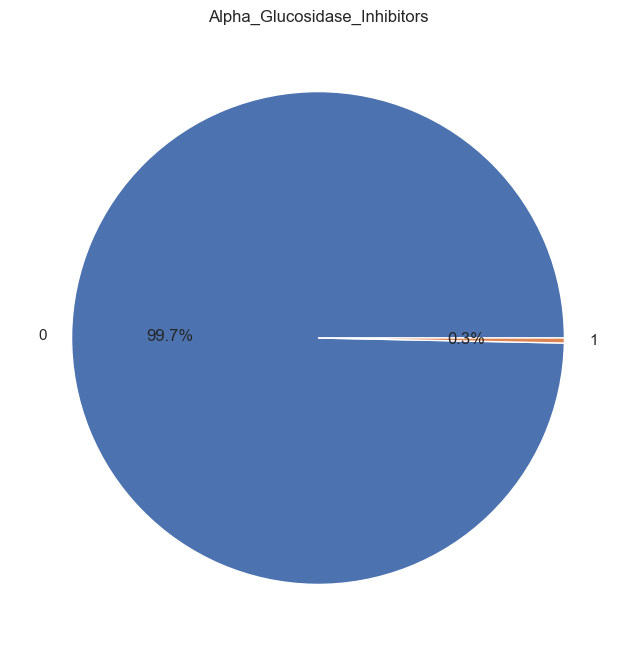

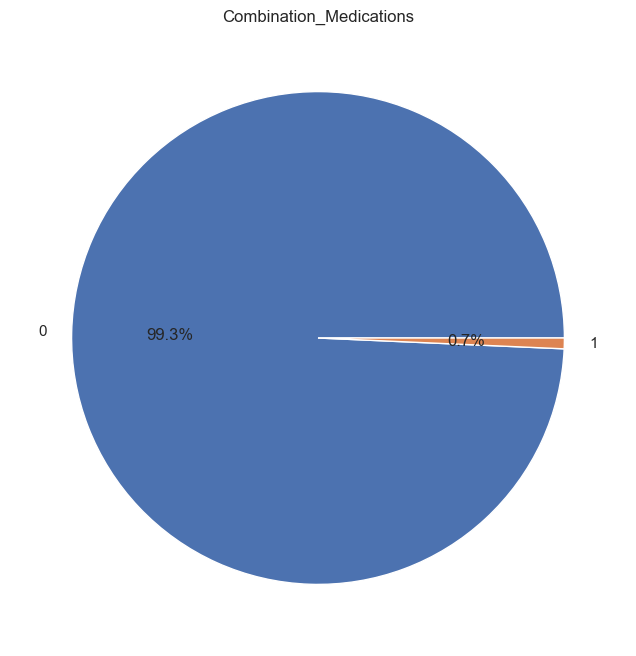

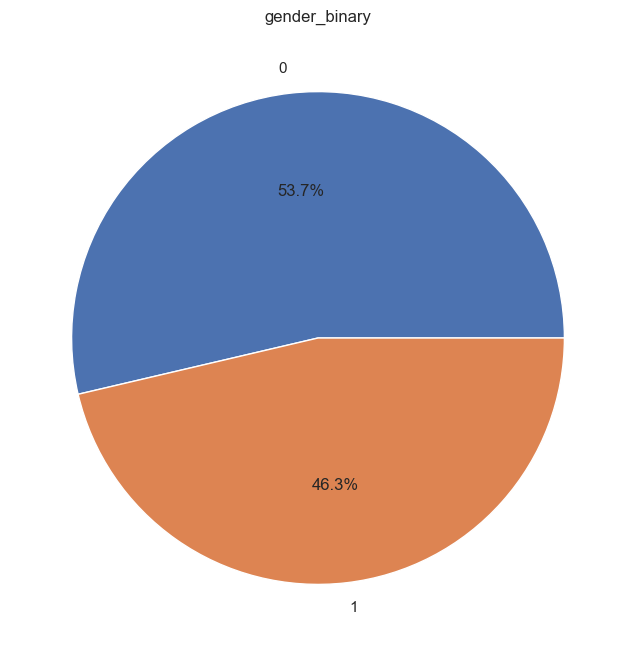

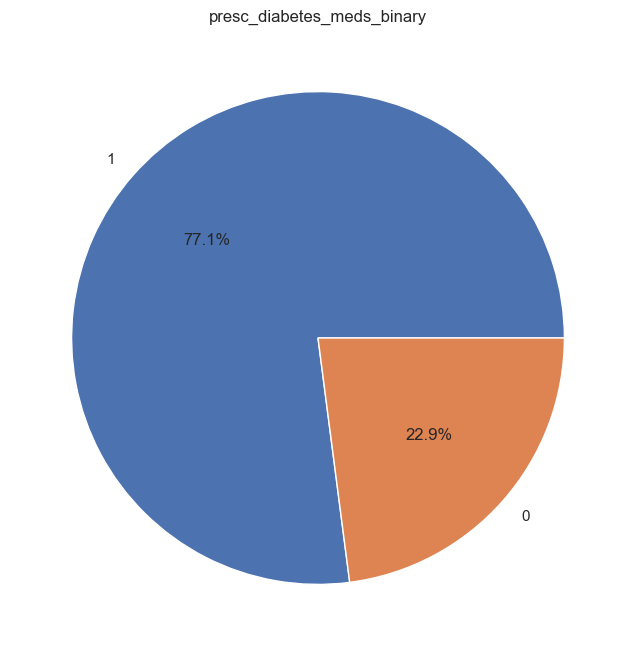

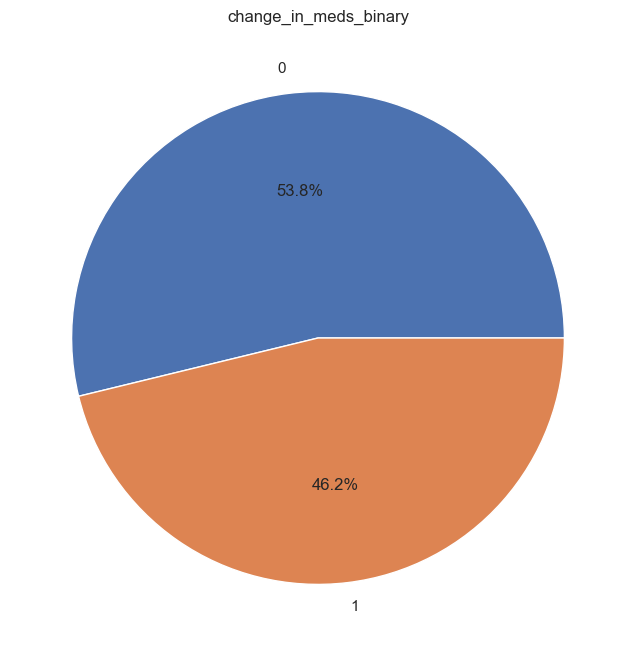

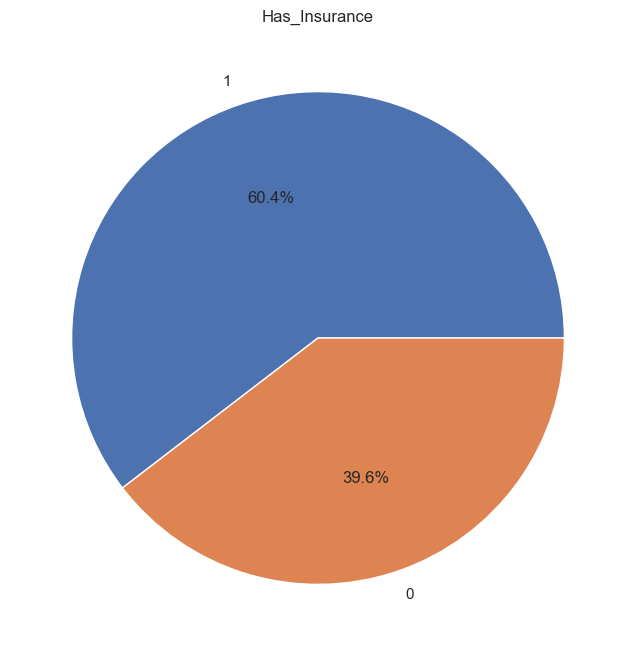

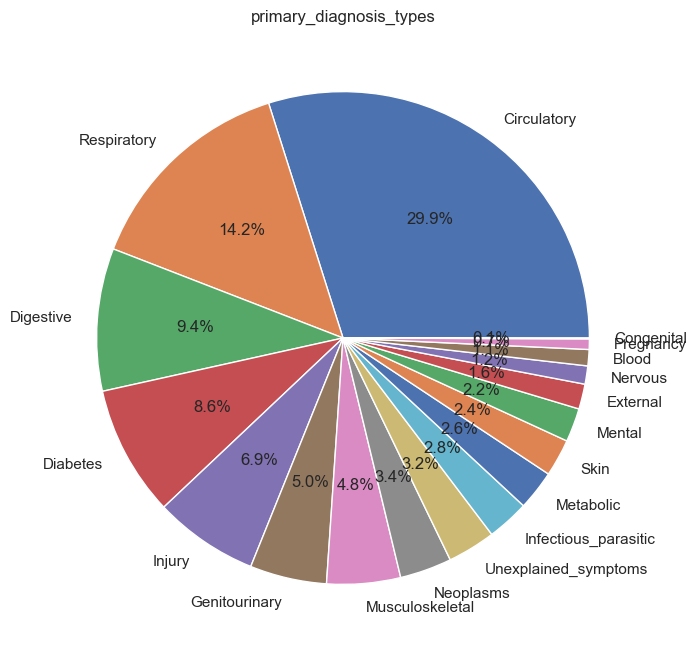

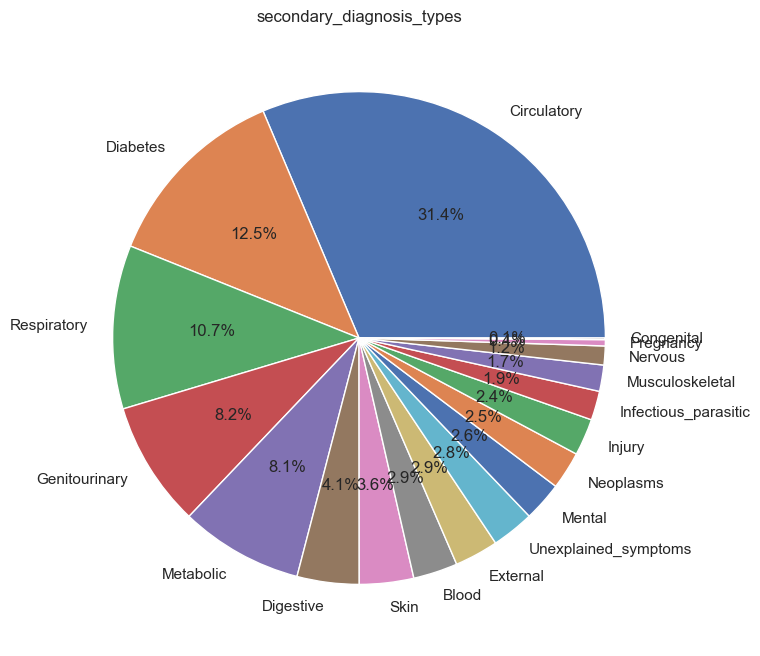

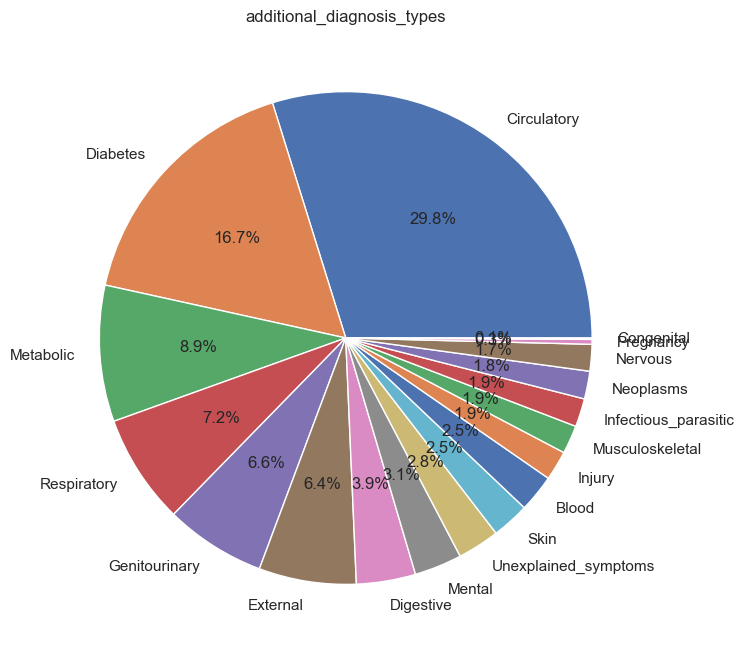

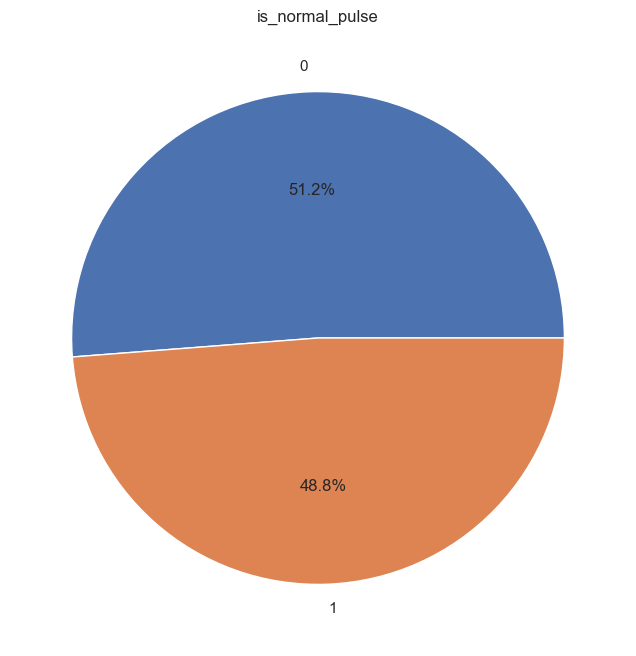

In [28]:
for feature in non_metric_features:
    plt.figure(figsize=(8, 8))
    non_metric_features[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(feature)
    plt.ylabel('')  
    plt.show()

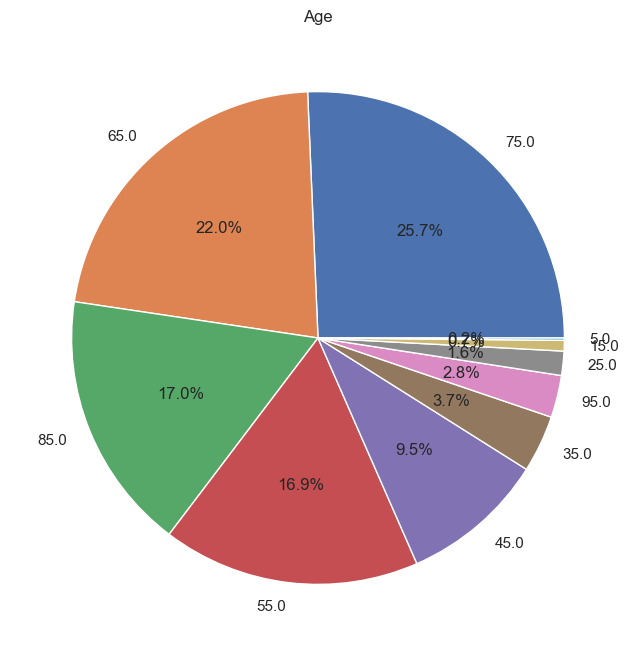

In [29]:
plt.figure(figsize=(8, 8))
metric_features['Midpoint_Age'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age')
plt.ylabel('')  # Para remover o nome da coluna do eixo y
plt.show()

### Correlation Matrix

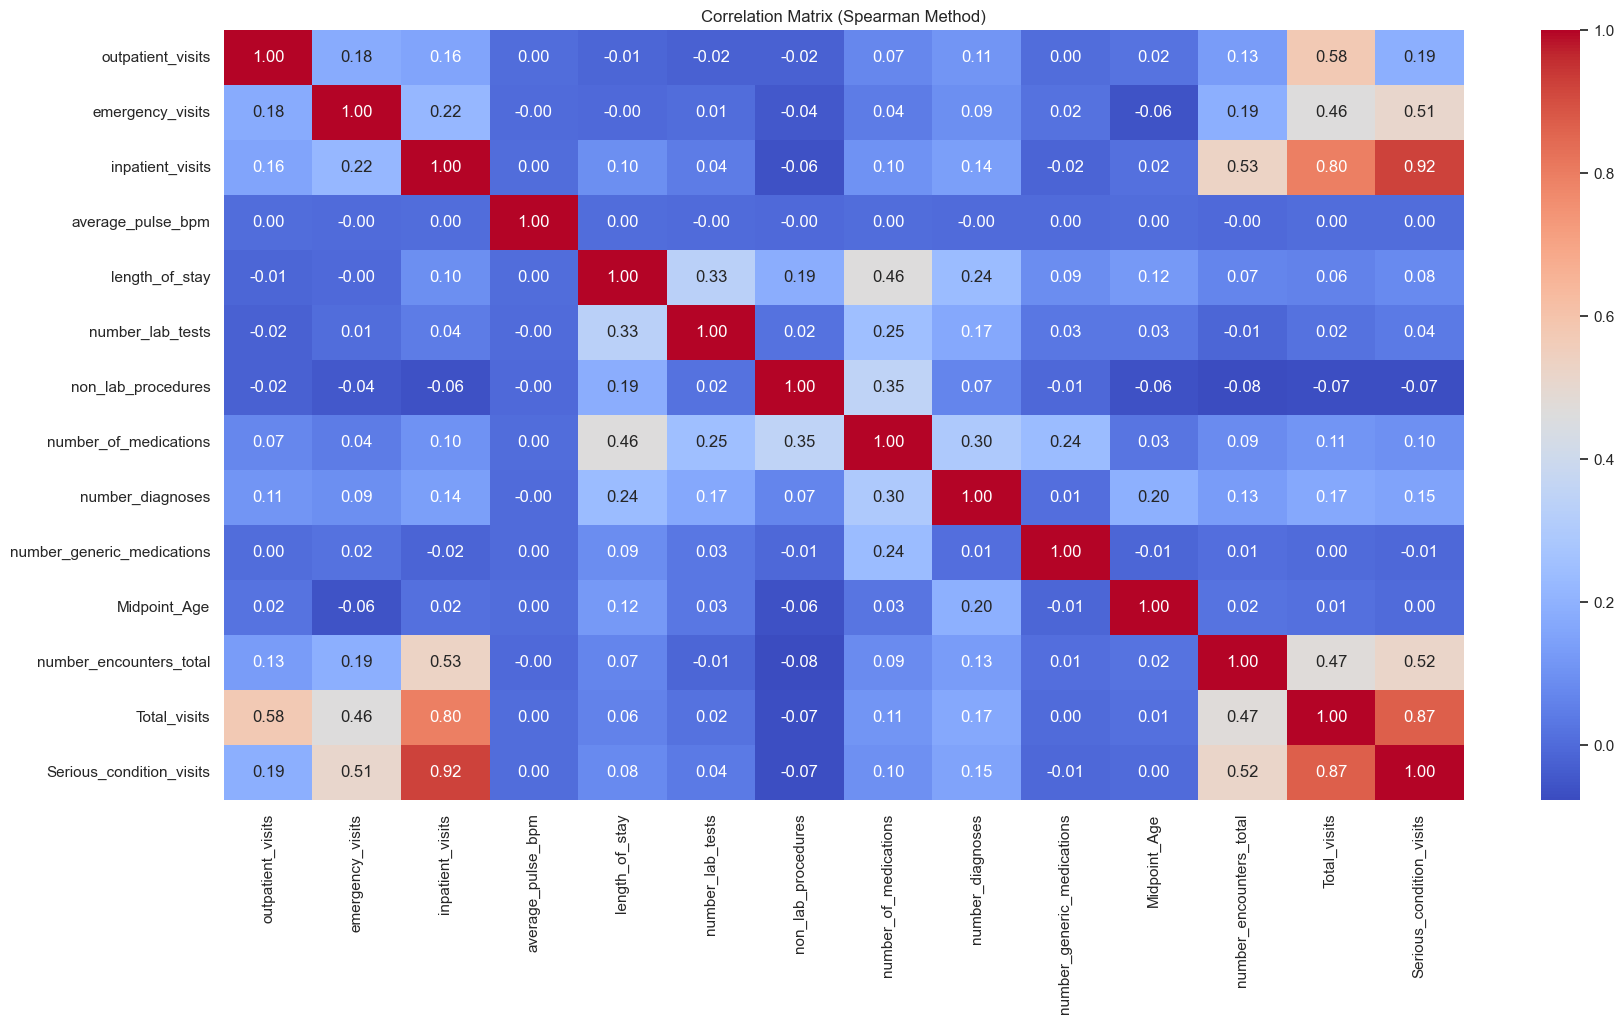

In [30]:
corr_matrix = metric_features.corr(method='spearman')

# Visualizando a matriz de correlação
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Spearman Method)")
plt.show()